In [ ]:
!pip install matplotlib seaborn
%pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, uniform
import numpy as np
from scipy.stats import kurtosis
import numpy as np
from scipy import stats
import warnings
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
len(df)

265627

In [ ]:
df.columns

Index(['Event', 'Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133',
       'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4',
       'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c',
       'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117',
       'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number',
       'event_number', 'label', 'individual'],
      dtype='object')

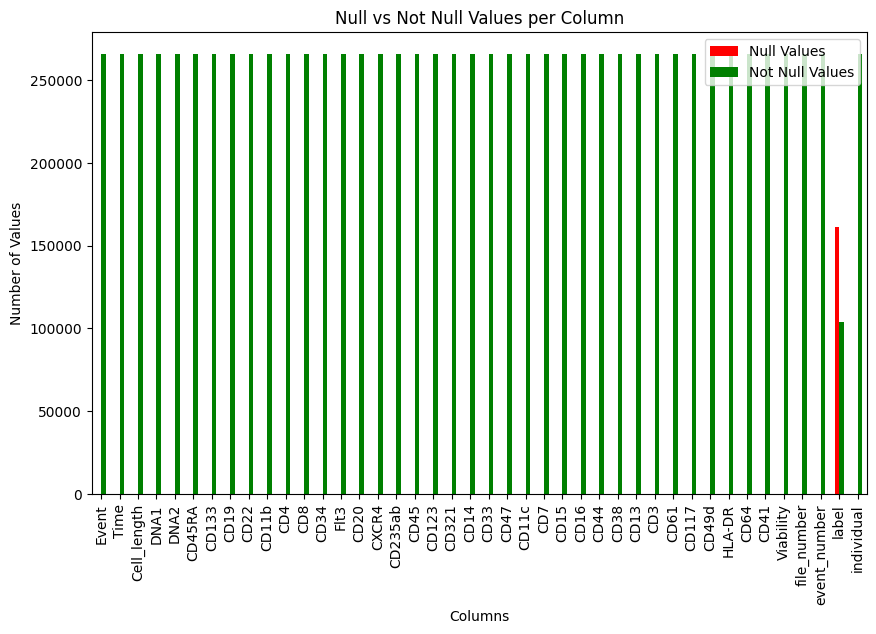

In [ ]:


null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()

null_vs_notnull = pd.DataFrame({
    'Null Values': null_counts,
    'Not Null Values': not_null_counts
})

null_vs_notnull.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])

plt.title('Null vs Not Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.xticks(rotation=90)

plt.show()

In [ ]:
df.describe()

Event           Time    Cell_length           DNA1  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean   132814.000000  272948.345014      34.450572       4.606956   
std     76680.054314  171220.139430      11.446694       1.312831   
min         1.000000       1.000000      10.000000       2.786488   
25%     66407.500000  120196.000000      26.000000       3.700023   
50%    132814.000000  253276.000000      33.000000       4.022127   
75%    199220.500000  424502.500000      41.000000       6.353313   
max    265627.000000  709122.440000      65.000000       7.001489   

                DNA2         CD45RA          CD133           CD19  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        5.198308       0.688127       0.145960       0.509301   
std         1.150357       0.609105       0.259267       0.857462   
min         2.236450      -0.057305      -0.058081      -0.058089   
25%         4.407822       0.204625      -0.022935      -0.018838   
50%         4.698415       0.549387       0.025353       0.075210   
75%         6.766268       1.031198       0.224299       0.548386   
max         7.472308       6.691197       5.527494       4.990085   

                CD22          CD11b  ...          CD117          CD49d  \
count  265627.000000  265627.000000  ...  265627.000000  265627.000000   
mean        0.397323       0.710319  ...       0.131199       0.794938   
std         0.762126       1.011434  ...       0.313208       0.627619   
min        -0.057342      -0.058236  ...      -0.057668      -0.058064   
25%        -0.020689      -0.000294  ...      -0.023957       0.283013   
50%         0.058790       0.257923  ...      -0.000410       0.677212   
75%         0.386481       0.923517  ...       0.154736       1.190787   
max         5.160477       5.260789  ...       5.502125       5.153438   

              HLA-DR           CD64           CD41      Viability  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        1.521812       0.551512       0.261754       0.570037   
std         1.694211       0.888739       0.617065       0.589738   
min        -0.057974      -0.058199      -0.058244      -0.057979   
25%         0.057709      -0.010582      -0.020166       0.065523   
50%         0.611335       0.122493       0.052229       0.398230   
75%         2.888240       0.604131       0.305591       0.931058   
max         7.052507       4.517843       7.718288       2.433031   

         file_number   event_number          label     individual  
count  265627.000000  265627.000000  104184.000000  265627.000000  
mean        3.639348  171288.314234       8.116102       1.279625  
std         0.018678  123904.361456       2.457486       0.448816  
min         3.627711       1.000000       1.000000       1.000000  
25%         3.627711   58679.500000       7.000000       1.000000  
50%         3.627711  152783.000000       8.000000       1.000000  
75%         3.669327  282369.000000      10.000000       2.000000  
max         3.669327  400112.000000      14.000000       2.000000  

[8 rows x 42 columns]

### new_df

In [ ]:
new_df = df.drop(['Event','Time','file_number','event_number','individual'],axis=1)

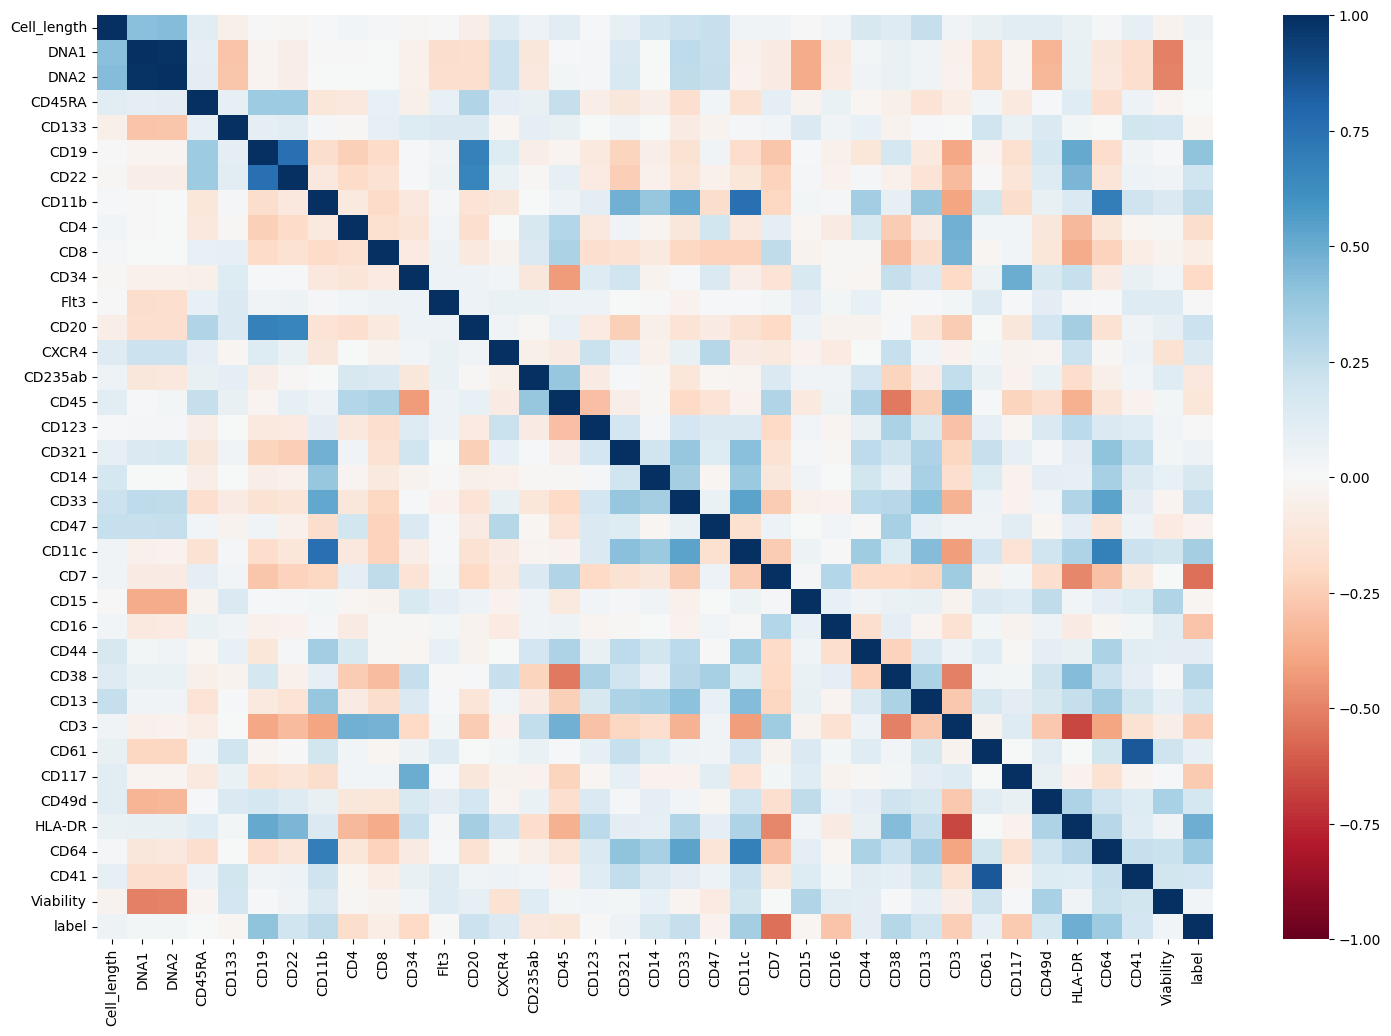

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(new_df.corr(),cmap='RdBu',vmin= -1,vmax=1)
plt.show()

In [ ]:
descriptive_stats = df.describe()


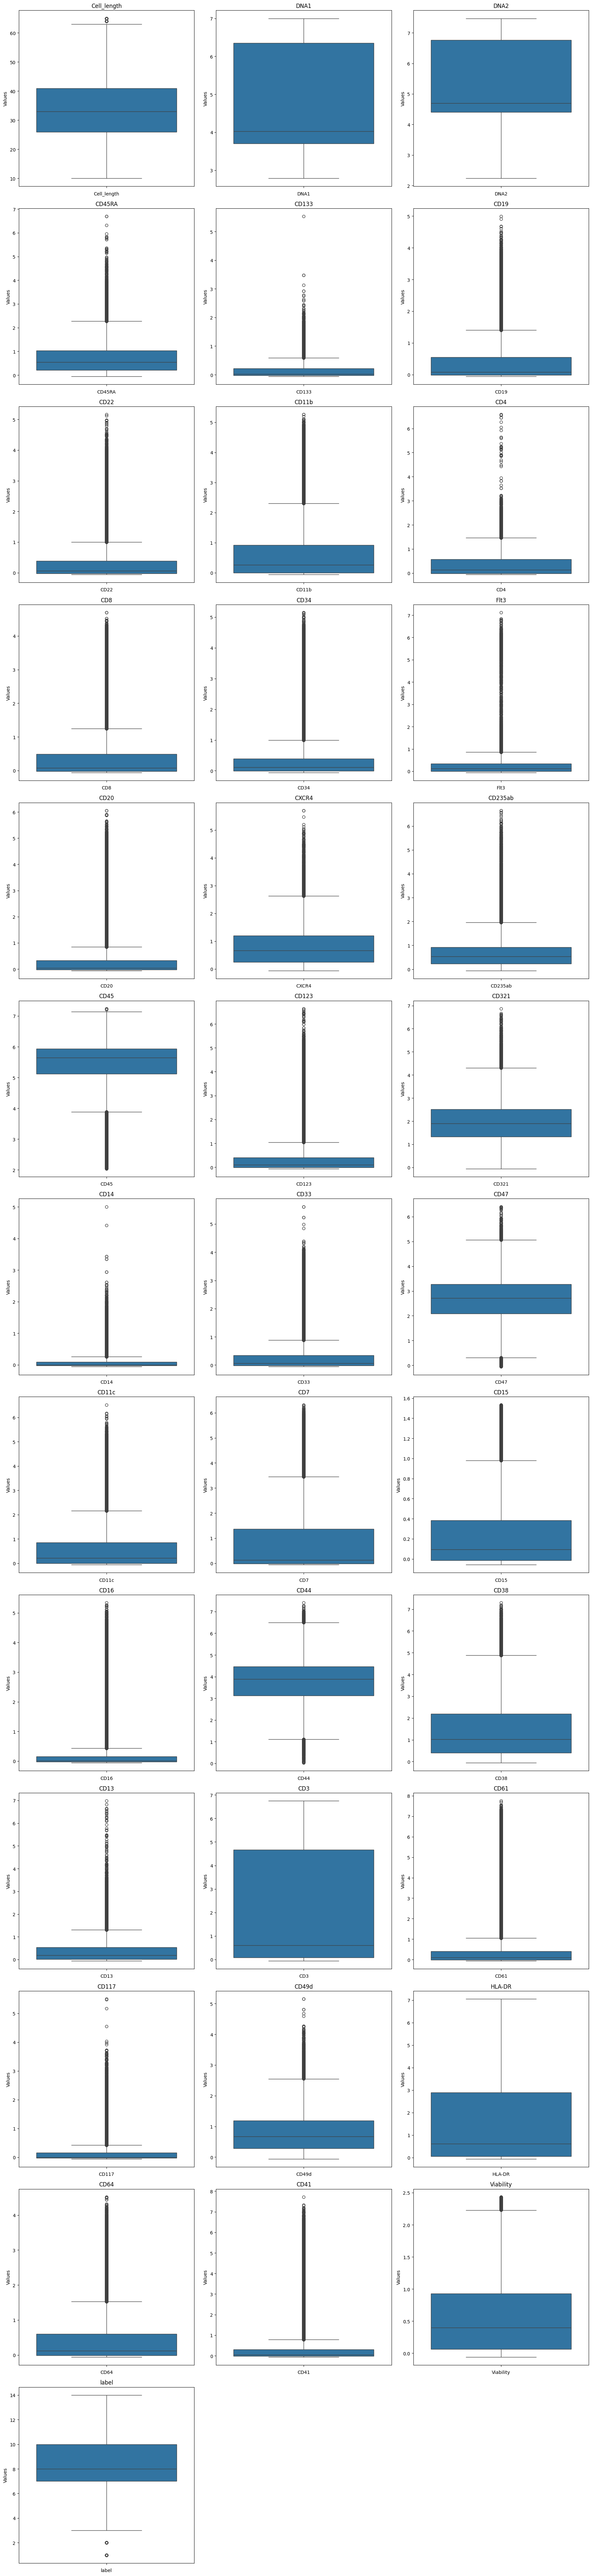

In [ ]:
num_features = len(new_df.columns)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

# Loop through each feature and plot the boxplot
for i, feature in enumerate(new_df.columns):
    sns.boxplot(data=new_df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel(f'{feature}', fontsize=10)
    axes[i].set_ylabel('Values', fontsize=10)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()


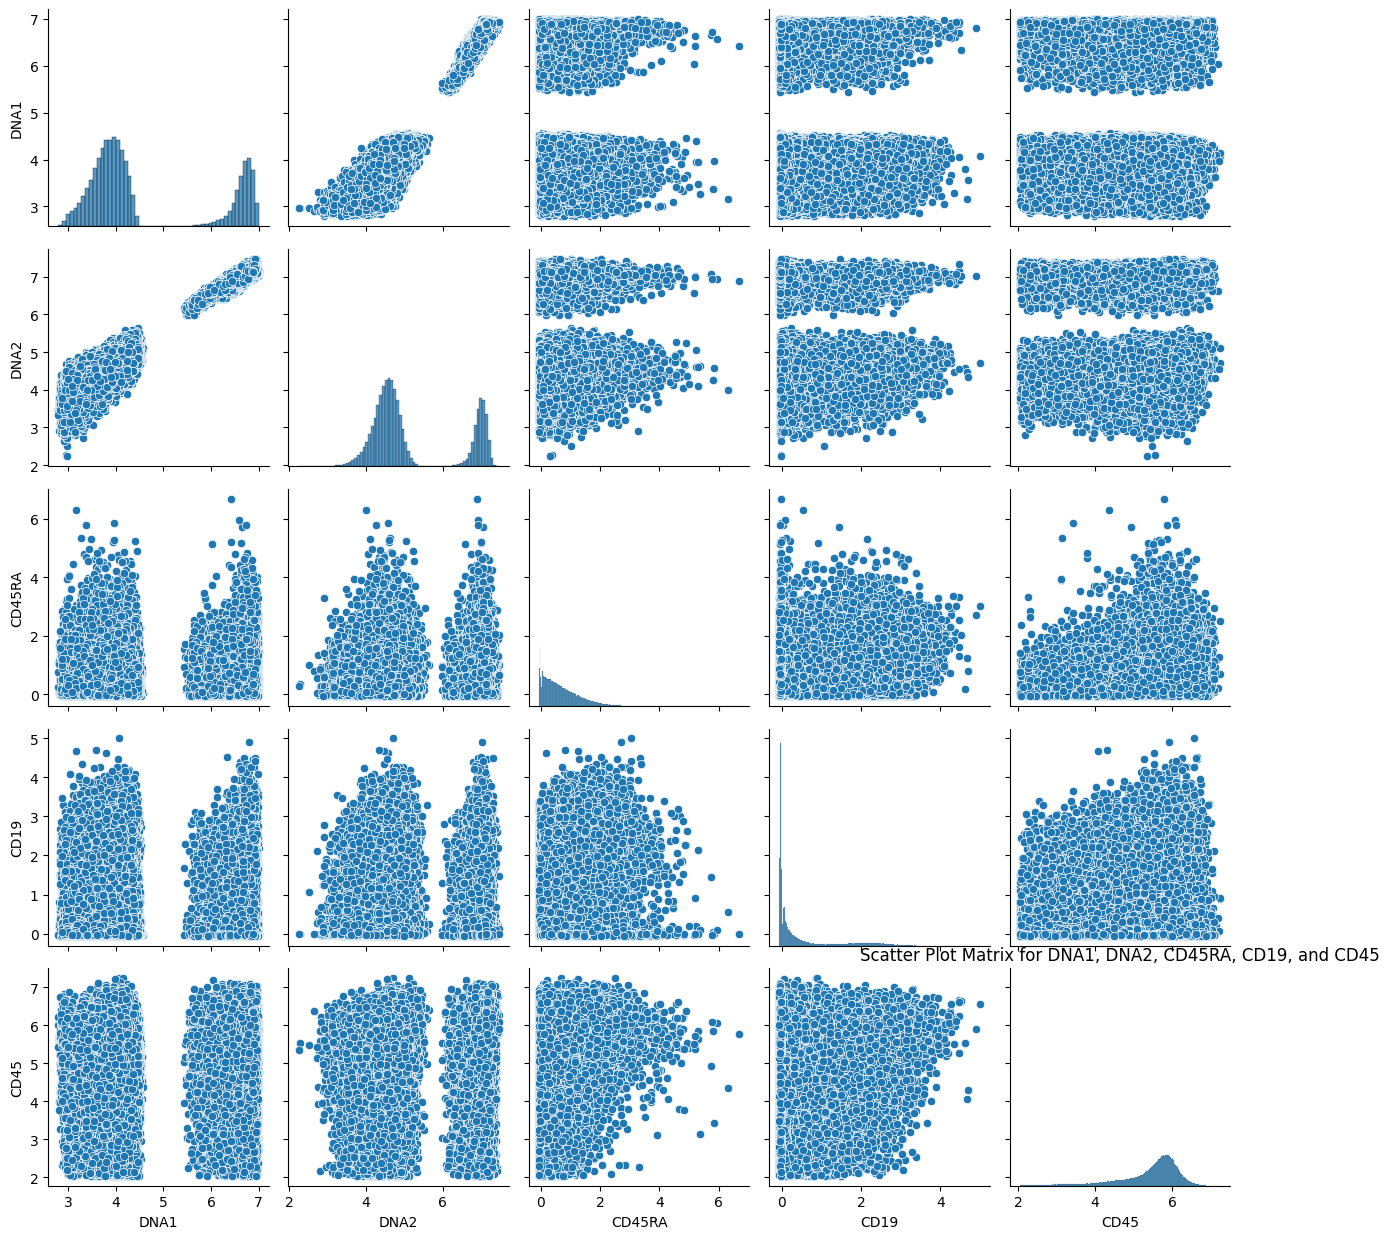

In [ ]:

warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(df[['DNA1', 'DNA2', 'CD45RA', 'CD19', 'CD45']])

plt.tight_layout()
plt.title('Scatter Plot Matrix for DNA1, DNA2, CD45RA, CD19, and CD45')
plt.show()

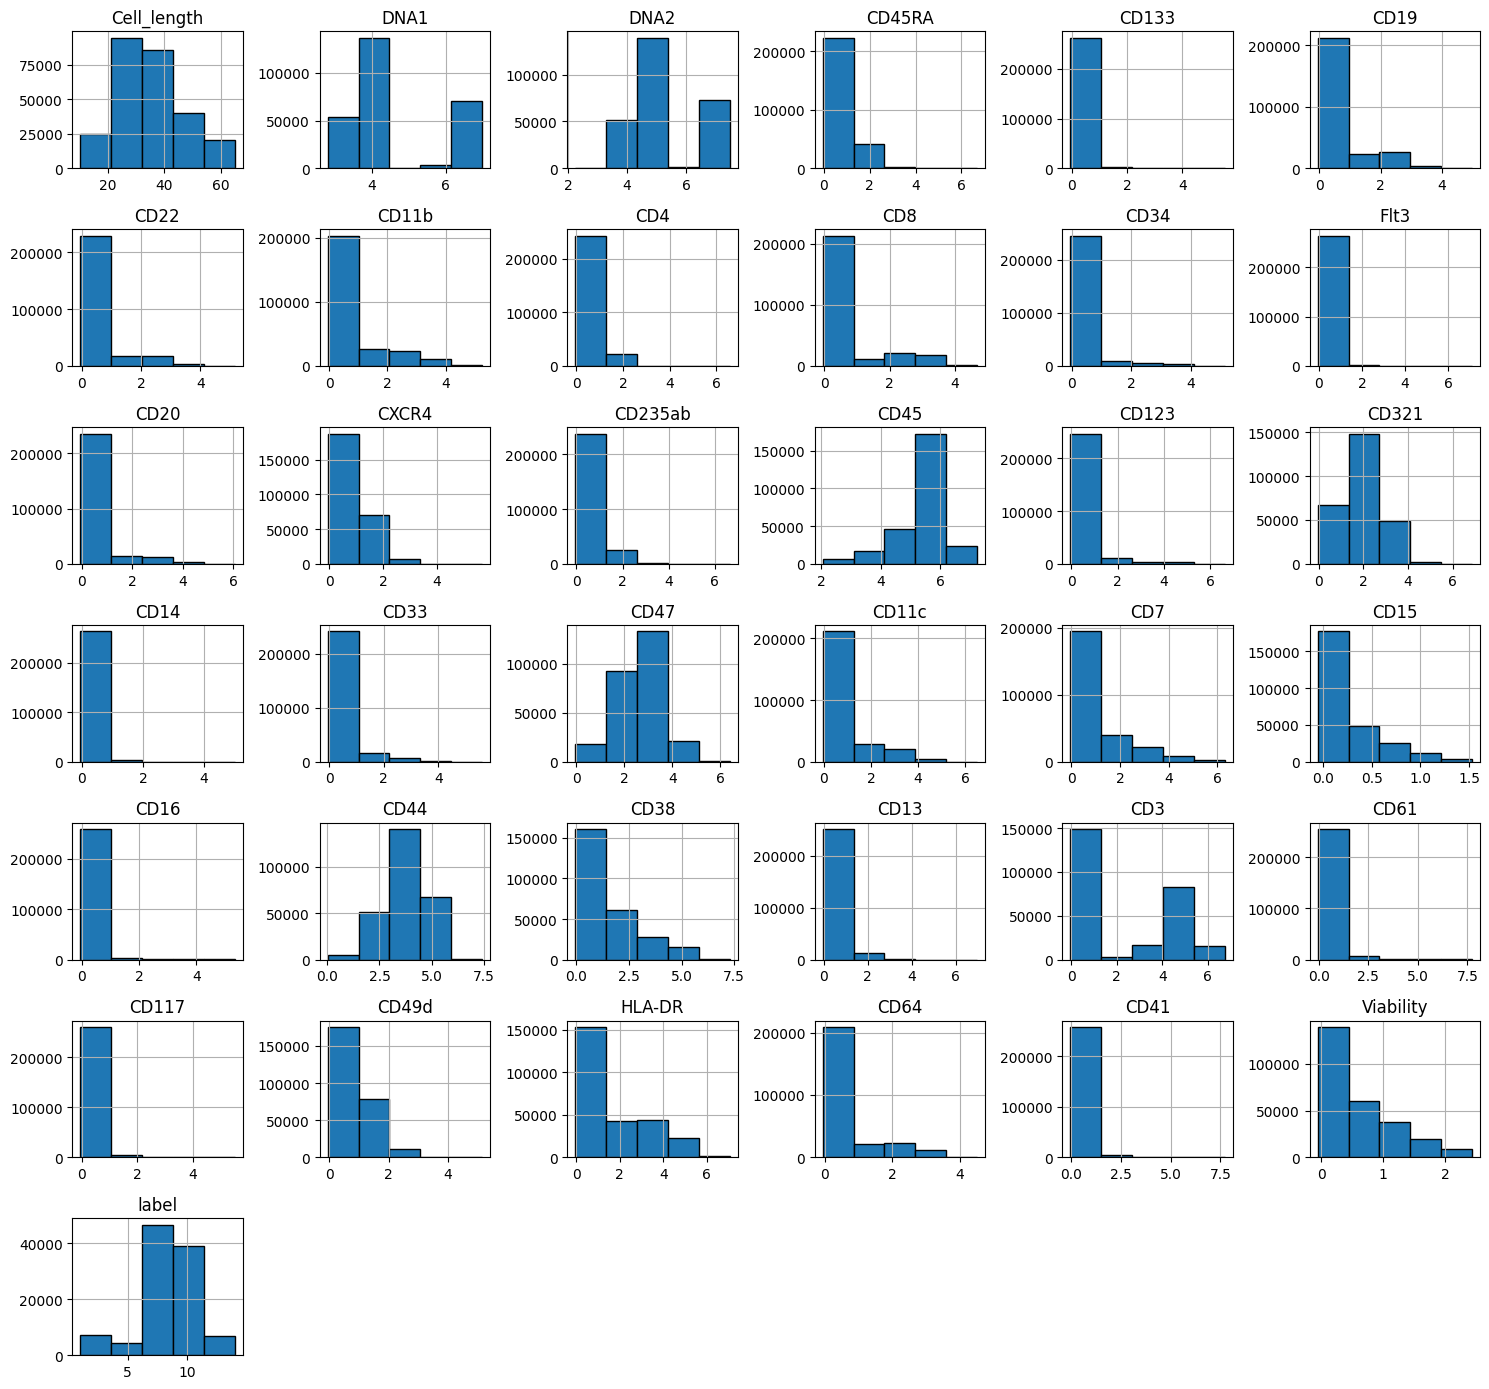

In [ ]:
new_df.hist(figsize=(15,14), bins=5,edgecolor='black')

plt.tight_layout()
plt.show()

In [ ]:
z_scores = np.abs(stats.zscore(new_df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=1)
outlier_count = (outliers > 0).sum()
print(f"\nNumber of rows with outliers (Z-score > 3): {outlier_count}")


Number of rows with outliers (Z-score > 3): 92238


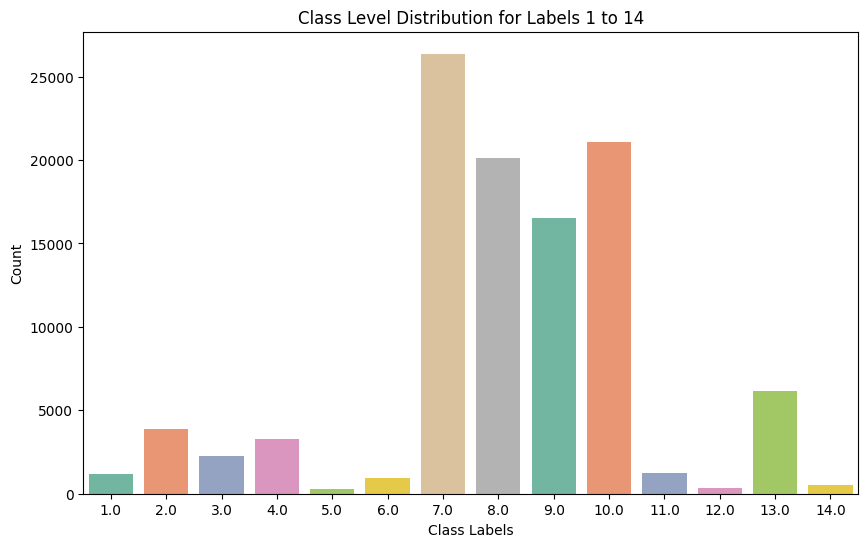

Class-level distribution (1 to 14):
label
1.0      1207
2.0      3905
3.0      2248
4.0      3295
5.0       304
6.0       916
7.0     26366
8.0     20108
9.0     16520
10.0    21099
11.0     1238
12.0      330
13.0     6135
14.0      513
Name: count, dtype: int64


In [ ]:

# Filter the dataset to only include labels from 1 to 14
filtered_df = df[df['label'].isin(range(1, 15))]

# Count the occurrences of each class (1 to 14)
class_counts = filtered_df['label'].value_counts().sort_index()

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Add titles and labels
plt.title('Class Level Distribution for Labels 1 to 14')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Print the class distribution
print("Class-level distribution (1 to 14):")
print(class_counts)


In [ ]:
# Calculate the minimum and maximum values for each feature
min_values = new_df.min()
max_values = new_df.max()

# Combine the min and max values into a DataFrame
min_max_df = pd.DataFrame({
    'Min Value': min_values,
    'Max Value': max_values
})

# Display the DataFrame in a more formatted and styled way
styled_min_max_df = min_max_df.style.set_properties(**{
    'background-color': 'lightyellow',
    'color': 'black',
    'border-color': 'black',
    'text-align': 'center'
}).set_caption("Minimum and Maximum Values for Each Feature").format("{:.2f}")

# Show the styled DataFrame
styled_min_max_df


In [ ]:
skewness = new_df.skew()
kurtosis_values = new_df.apply(lambda x: kurtosis(x, fisher=False))

In [ ]:
skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
})

In [ ]:
print("Skewness and Kurtosis for each feature:")
print(skew_kurt_df)

Skewness and Kurtosis for each feature:
             Skewness   Kurtosis
Cell_length  0.527835   2.834033
DNA1         0.845015   1.994037
DNA2         0.779171   1.975021
CD45RA       1.191601   4.964272
CD133        2.141965   9.190066
CD19         1.682619   4.590887
CD22         2.283194   7.500223
CD11b        1.679098   4.964495
CD4          1.622053   5.844261
CD8          1.775723   4.745776
CD34         3.492457  16.596416
Flt3         7.098191  85.583534
CD20         2.754715  10.435449
CXCR4        0.955347   3.936307
CD235ab      2.001491  13.440586
CD45        -1.484832   5.246770
CD123        3.648911  18.361217
CD321        0.247098   2.914593
CD14         3.609026  23.062535
CD33         2.724993  10.967536
CD47        -0.250324   2.943834
CD11c        1.733898   5.117156
CD7          1.606537   4.885115
CD15         1.445155   4.504387
CD16         5.733236  42.287749
CD44        -0.431592   2.918792
CD38         1.141488   3.521190
CD13         2.234324  10.637564
CD3

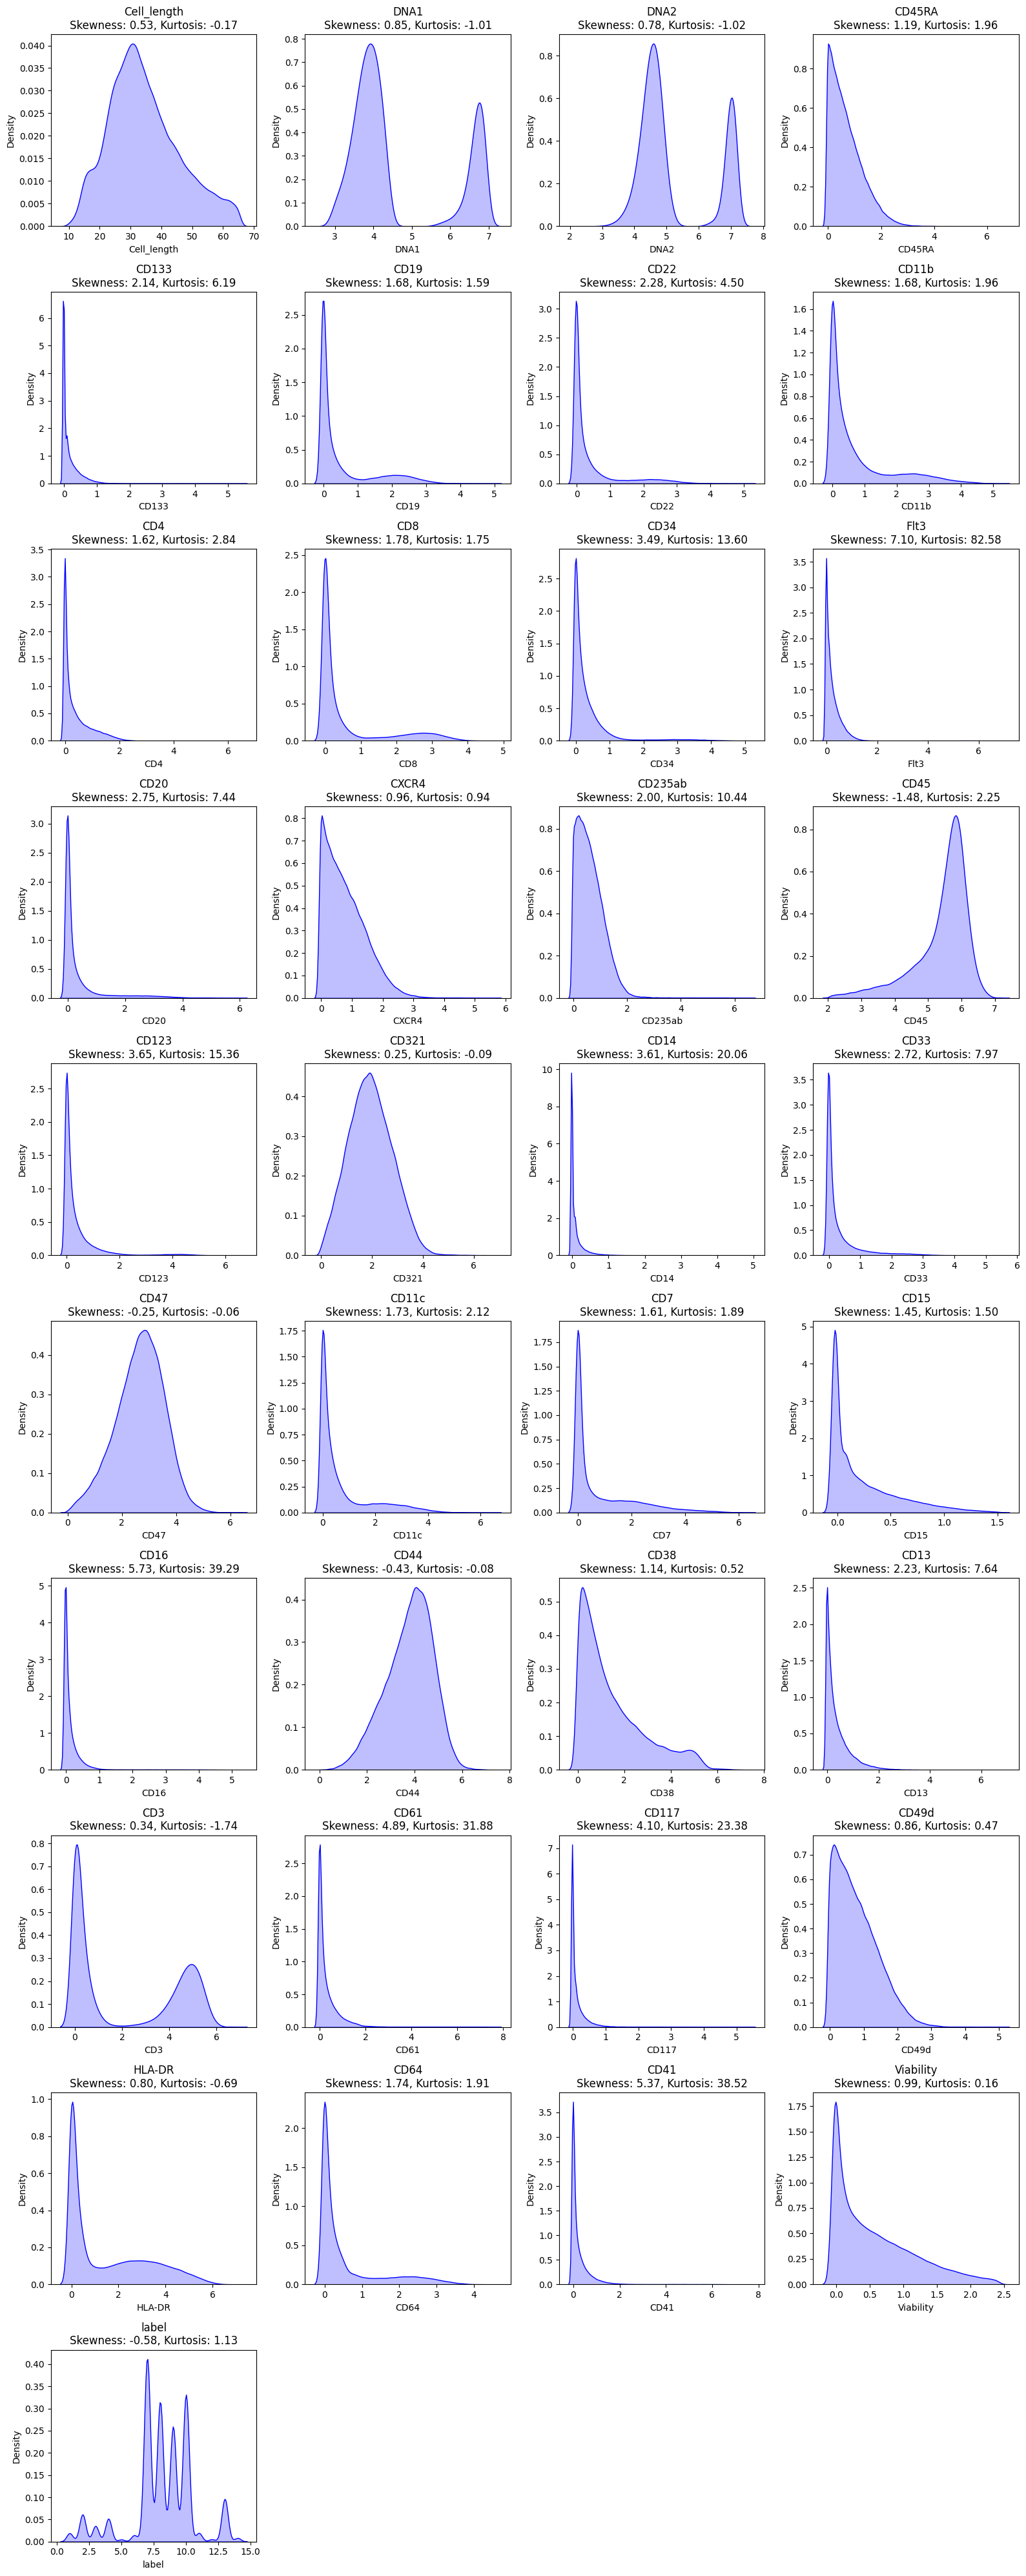

In [ ]:


needed_cols = new_df.columns

num_cols = 4
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
axs = axs.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(needed_cols):
    sns.kdeplot(new_df[col].dropna(), ax=axs[i], fill=True, color='blue')

    skewness_value = skew(new_df[col].dropna())
    kurtosis_value = kurtosis(new_df[col].dropna())

    axs[i].set_title(f'{col}\nSkewness: {skewness_value:.2f}, Kurtosis: {kurtosis_value:.2f}')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


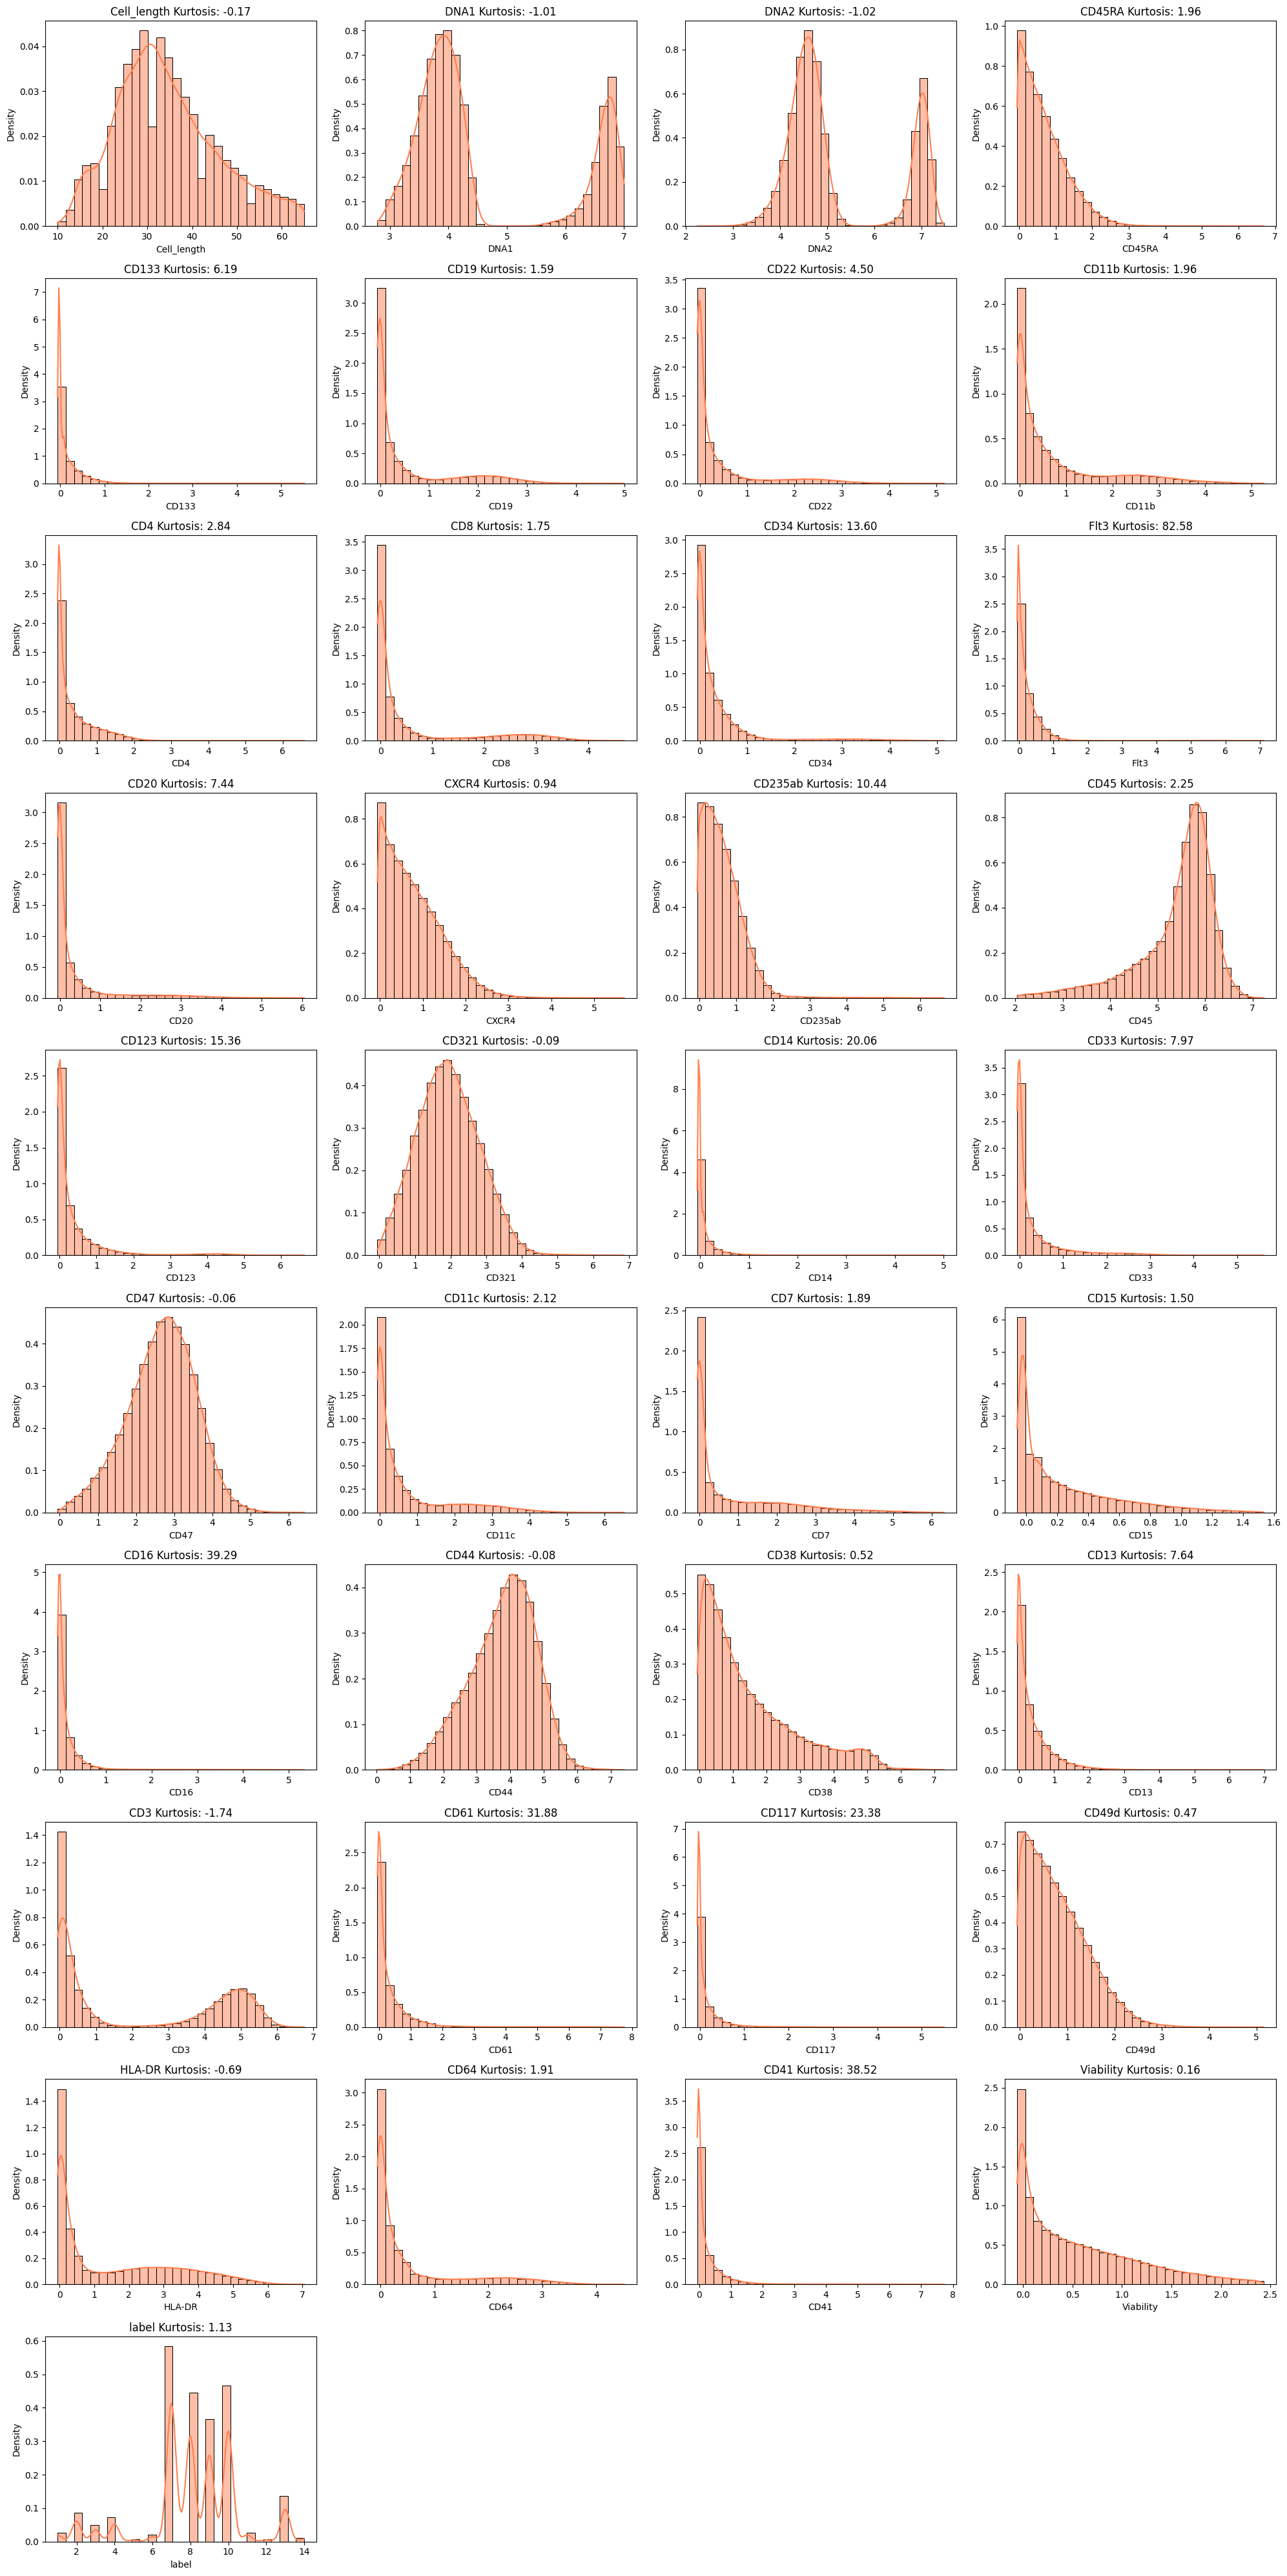

In [ ]:

needed_cols = new_df.columns

num_cols = 4
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

plot_color = 'coral'

for i, col in enumerate(needed_cols):
    sns.histplot(new_df[col], kde=True, ax=axes[i], bins=30, color=plot_color,stat='density')
    axes[i].set_title(f'{col} Kurtosis: {kurtosis(new_df[col].dropna()):.2f}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

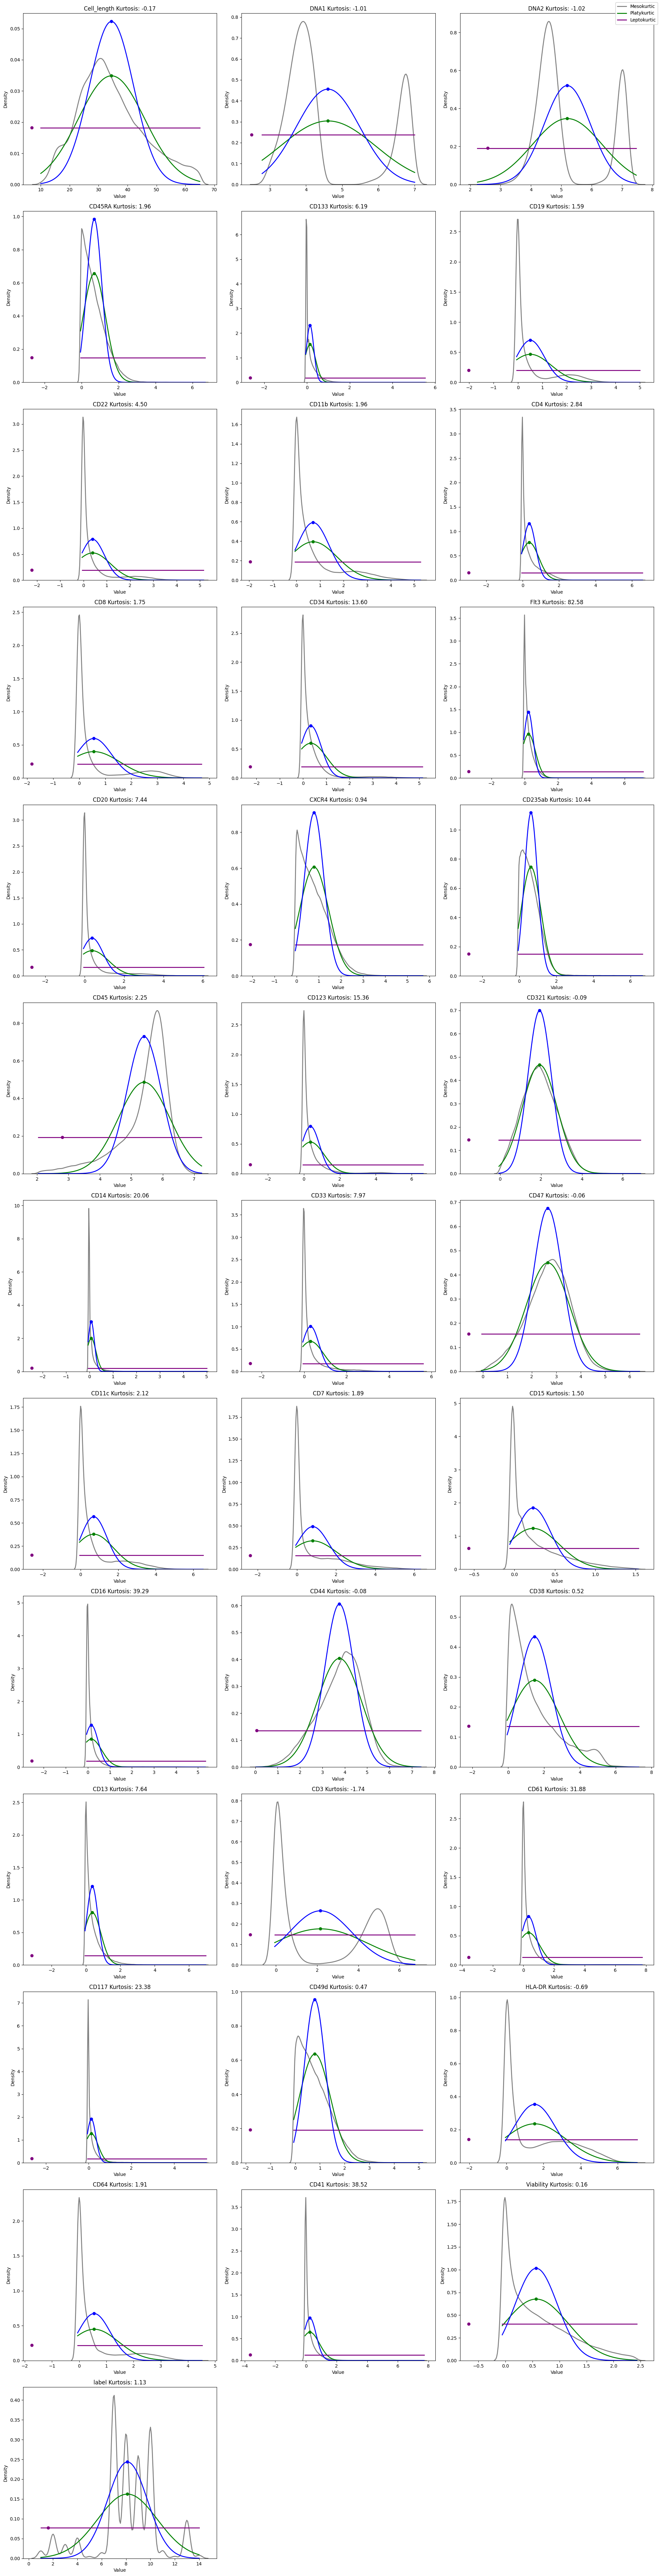

In [ ]:
needed_cols = new_df.columns

num_cols = 3  # Number of columns in the subplot
num_rows = (len(needed_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(needed_cols):
    data = new_df[col].dropna()

    x = np.linspace(min(data), max(data), 1000)
    meso_dist = norm.pdf(x, loc=np.mean(data), scale=np.std(data))

    # Generate Platykurtic and Leptokurtic distributions
    platy_dist = uniform.pdf(x, loc=min(data), scale=(max(data) - min(data)))
    lepto_dist = norm.pdf(x, loc=np.mean(data), scale=np.std(data) / 1.5)  # steeper peak

    sns.kdeplot(data, ax=axes[i], color='gray', label=f'{col} Data', linewidth=2)

    # Plot the different kurtosis distributions
    axes[i].plot(x, meso_dist, label="Mesokurtic", color="green", linewidth=2)
    axes[i].plot(x, platy_dist, label="Platykurtic", color="purple", linewidth=2)
    axes[i].plot(x, lepto_dist, label="Leptokurtic", color="blue", linewidth=2)

    axes[i].scatter([np.mean(data), np.mean(data) - (max(data) - min(data)) / 2, np.mean(data)],
                    [max(meso_dist), max(platy_dist), max(lepto_dist)],
                    color=['green', 'purple', 'blue'], zorder=5)

    # Set the title and labels
    kurt_value = kurtosis(data)
    axes[i].set_title(f'{col} Kurtosis: {kurt_value:.2f}', fontsize=12)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    fig.legend(['Mesokurtic', 'Platykurtic', 'Leptokurtic'], loc='upper right', fontsize=10)

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


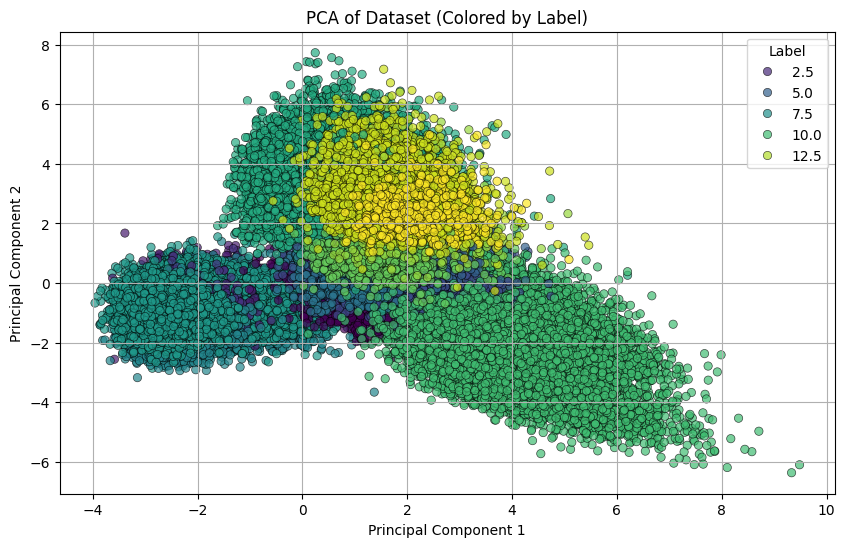

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop rows with missing labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_new_df[needed_cols])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results with labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = cleaned_new_df['label'].values

# Plot PCA results with colors for each label
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='label',  # Color points by label
    palette='viridis',  # Choose a color palette
    data=pca_df,
    edgecolor='k',
    alpha=0.7
)

# Add plot labels and title
plt.title('PCA of Dataset (Colored by Label)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Label', loc='upper right')
plt.show()


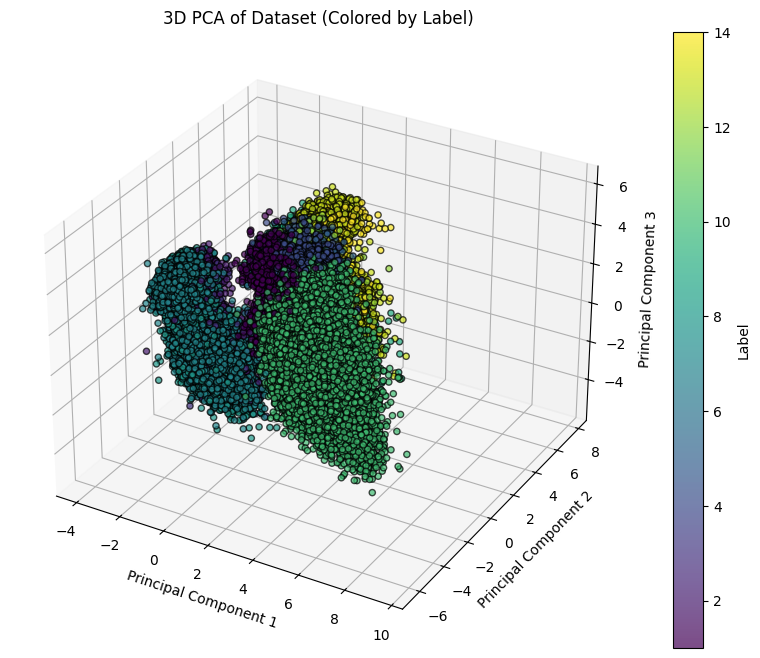

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Drop rows with missing labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_new_df[needed_cols])

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results with labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = cleaned_new_df['label'].values

# Plot PCA results in 3D with colors for each label
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['label'],  # Color points by label
    cmap='viridis',     # Choose a color palette
    edgecolor='k',
    alpha=0.7
)

# Set axis labels and plot title
ax.set_title('3D PCA of Dataset (Colored by Label)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show color bar and plot
plt.colorbar(scatter, ax=ax, label='Label')
plt.show()


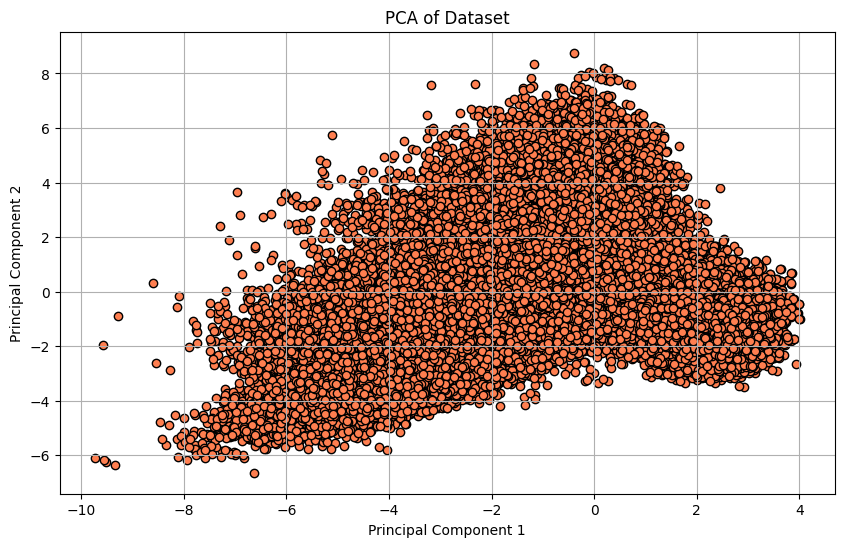

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

needed_cols = new_df.columns

# Fill missing values with the mean of each column
new_df_filled = new_df[needed_cols].fillna(new_df.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df_filled)

pca = PCA(n_components=2)  # Reducing to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Ploting PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='coral', edgecolor='k')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



11490434/11490434 [==============================] - 0s 0us/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.077057
[t-SNE] KL divergence after 1000 iterations: 0.901052


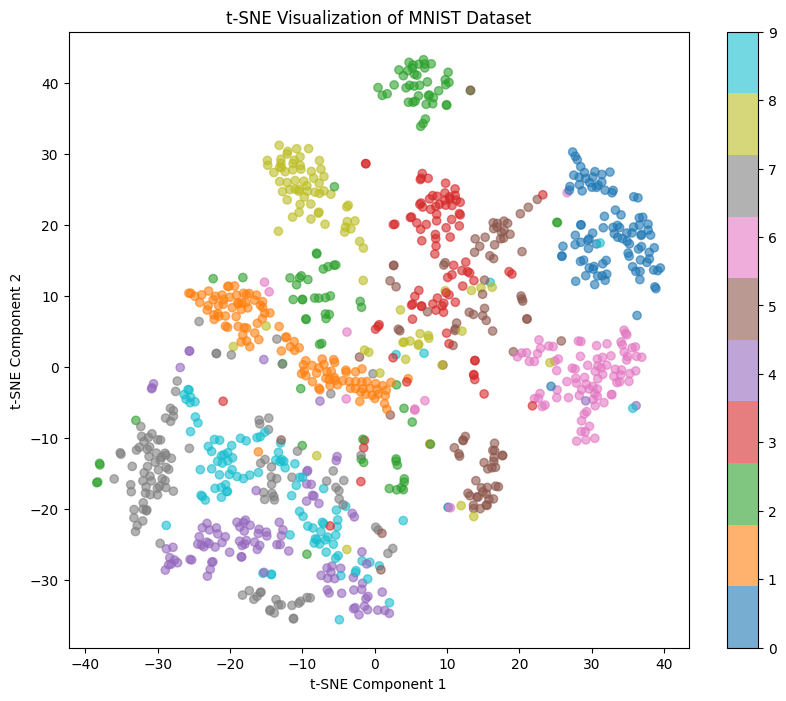

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.016s...
[t-SNE] Computed neighbors for 104184 samples in 16.663s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probab

<ipython-input-27-3794f099bead>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
<ipython-input-27-3794f099bead>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]


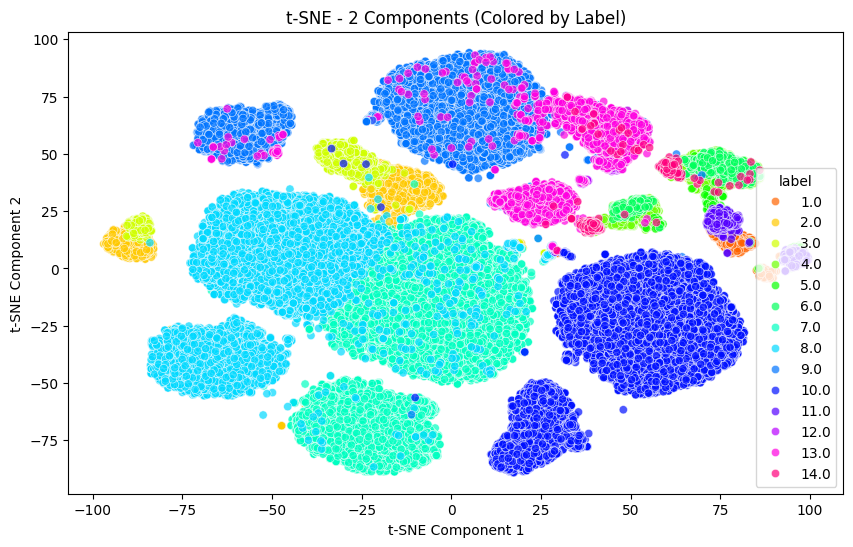

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'new_df' is your dataset, and the 'label' column contains class labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Select numerical features for t-SNE
numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

# Handle missing values (if any are left)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]

# Plot the t-SNE results with different colors for each label
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne-2d-one',
    y='tsne-2d-two',
    hue='label',  # Use the 'label' column for color encoding
    palette=sns.color_palette("hsv", len(cleaned_new_df['label'].unique())),  # Color palette for labels
    data=cleaned_new_df,
    legend='full',
    alpha=0.7
)

plt.title('t-SNE - 2 Components (Colored by Label)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.012s...
[t-SNE] Computed neighbors for 104184 samples in 16.452s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probab

<ipython-input-28-5653f18018b6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
<ipython-input-28-5653f18018b6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]


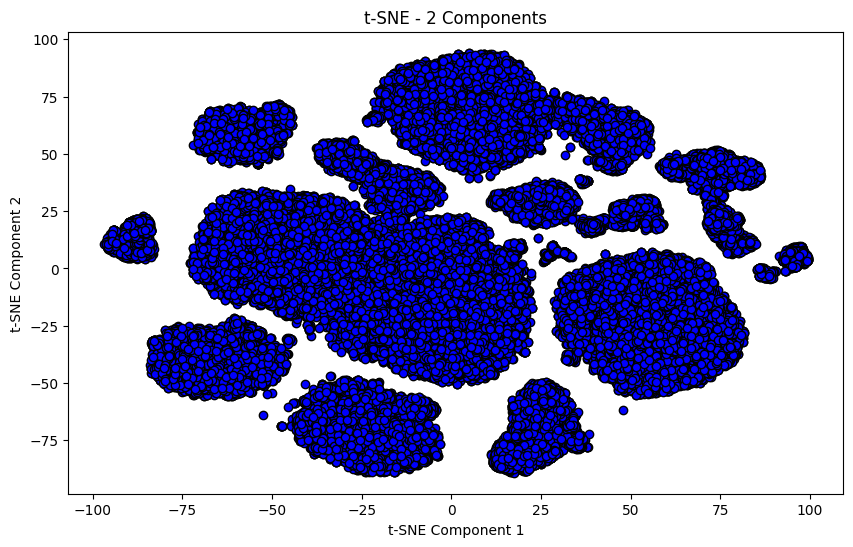

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

cleaned_new_df = new_df.dropna(subset=['label'])

numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)

X_tsne = tsne.fit_transform(X_scaled)

cleaned_new_df['tsne-2d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-2d-two'] = X_tsne[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_new_df['tsne-2d-one'], cleaned_new_df['tsne-2d-two'], c='blue', edgecolor='k')
plt.title('t-SNE - 2 Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104184 samples in 0.016s...
[t-SNE] Computed neighbors for 104184 samples in 22.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104184
[t-SNE] Computed conditional probabilities for sample 2000 / 104184
[t-SNE] Computed conditional probabilities for sample 3000 / 104184
[t-SNE] Computed conditional probabilities for sample 4000 / 104184
[t-SNE] Computed conditional probabilities for sample 5000 / 104184
[t-SNE] Computed conditional probabilities for sample 6000 / 104184
[t-SNE] Computed conditional probabilities for sample 7000 / 104184
[t-SNE] Computed conditional probabilities for sample 8000 / 104184
[t-SNE] Computed conditional probabilities for sample 9000 / 104184
[t-SNE] Computed conditional probabilities for sample 10000 / 104184
[t-SNE] Computed conditional probabilities for sample 11000 / 104184
[t-SNE] Computed conditional probabilities for sample 12000 / 104184
[t-SNE] Computed conditional probab

<ipython-input-31-aa456e98bd5d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-3d-one'] = X_tsne[:, 0]
<ipython-input-31-aa456e98bd5d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_new_df['tsne-3d-two'] = X_tsne[:, 1]
<ipython-input-31-aa456e98bd5d>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

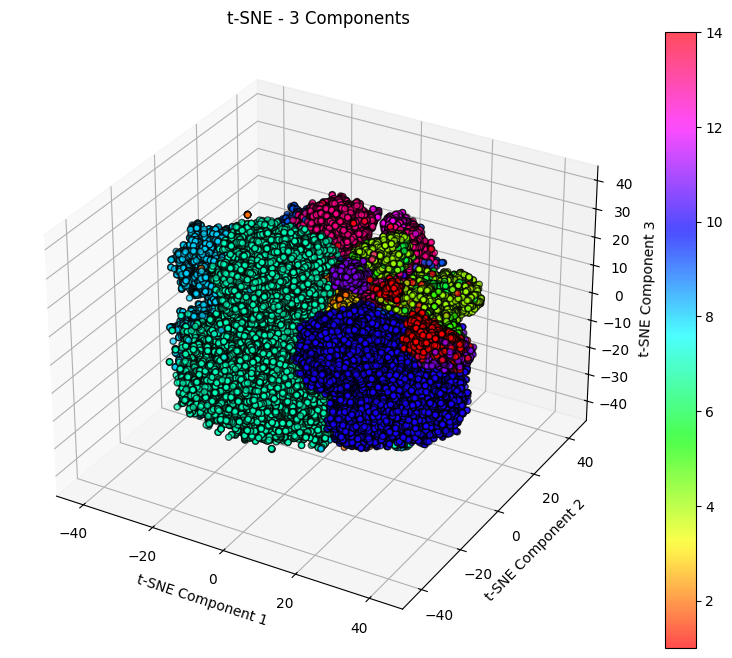

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'new_df' is your dataset, and the 'label' column contains class labels
cleaned_new_df = new_df.dropna(subset=['label'])

# Select numerical features for t-SNE
numeric_columns = cleaned_new_df.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_columns if col != 'label']

# Prepare the data
X = cleaned_new_df[features].values

# Handle missing values (if any are left)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Initialize t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000, verbose=1)

# Fit and transform the data
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to the DataFrame
cleaned_new_df['tsne-3d-one'] = X_tsne[:, 0]
cleaned_new_df['tsne-3d-two'] = X_tsne[:, 1]
cleaned_new_df['tsne-3d-three'] = X_tsne[:, 2]

# Plot the 3D t-SNE results with different colors for each label
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    cleaned_new_df['tsne-3d-one'],
    cleaned_new_df['tsne-3d-two'],
    cleaned_new_df['tsne-3d-three'],
    c=cleaned_new_df['label'],  # Color points based on 'label'
    cmap='hsv',  # Color map for the labels
    edgecolor='k',
    alpha=0.7
)

# Add axis labels and title
ax.set_title('t-SNE - 3 Components')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Show color bar
plt.colorbar(scatter)
plt.show()


In [32]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'X_scaled' is your standardized data
# Perform PCA
pca = PCA(n_components=4)  # Adjust n_components based on your need
pca.fit(X_scaled)

# Get explained variance (eigenvalues) and proportion of variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
std_dev = np.sqrt(explained_variance)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a pandas DataFrame for better formatting
pca_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

# Display the formatted table
pca_table = pca_table.style.format({
    'Standard Deviation': "{:.4f}",
    'Proportion of Variance': "{:.4f}",
    'Cumulative Proportion': "{:.4f}"
})

pca_table


In [33]:
import pandas as pd
import numpy as np

# Create a sample DataFrame called 'demodata' for demonstration
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability
mask = np.random.binomial(1, p_m, data_array.shape)

# Apply the mask to the data array, setting masked elements to NaN
masked_data = np.where(mask, np.nan, data_array)

# Convert back to a DataFrame for easier analysis
masked_demodata = pd.DataFrame(masked_data, columns=demodata.columns)

print("Original DataFrame (demodata):\n", demodata)
print("\nMasked DataFrame (masked_demodata):\n", masked_demodata)


Original DataFrame (demodata):
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Masked DataFrame (masked_demodata):
    column1  column2  column3
0      5.0      NaN      NaN
1     12.0     20.0     25.0
2     18.0      NaN     35.0
3      NaN     30.0      NaN


In [34]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(42)
demodata = pd.DataFrame({
    'column1': [5, 12, 18, 7],
    'column2': [10, 20, 15, 30],
    'column3': [8, 25, 35, 40]
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability, where 1 = not masked, 0 = masked
mask = np.random.binomial(1, 1 - p_m, data_array.shape)  # Reverse probability for desired 1/0 output

# Convert to a DataFrame for easier analysis
binary_mask_df = pd.DataFrame(mask, columns=demodata.columns)

print("Original DataFrame :\n", demodata)
print("\nBinary Mask DataFrame :\n", binary_mask_df)


Original DataFrame :
    column1  column2  column3
0        5       10        8
1       12       20       25
2       18       15       35
3        7       30       40

Binary Mask DataFrame :
    column1  column2  column3
0        1        0        0
1        1        1        1
2        1        0        1
3        0        1        0


In [35]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with random digits
np.random.seed(42)
demodata = pd.DataFrame({
    'Feature1': np.random.randint(1,100,5),
    'Feature2': np.random.randint(1,100,5),
    'Feature3': np.random.randint(1,100,5)
})

# Define the probability of masking (e.g., 0.3 means a 30% chance each element will be masked)
p_m = 0.3

# Convert 'demodata' to a NumPy array for masking
data_array = demodata.values

# Generate a binary mask based on the probability
mask = np.random.binomial(1, p_m, data_array.shape)

# Apply the mask to the data array, setting masked elements to NaN
masked_data = np.where(mask, np.nan, data_array)

# Convert back to a DataFrame for easier analysis
masked_demodata = pd.DataFrame(masked_data, columns=demodata.columns)

print("Original DataFrame (demodata):\n", demodata)
print("\nMasked DataFrame (masked_demodata):\n", masked_demodata)


Original DataFrame (demodata):
    Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Masked DataFrame (masked_demodata):
    Feature1  Feature2  Feature3
0       NaN       NaN      88.0
1      93.0      83.0      24.0
2      15.0      87.0       3.0
3      72.0      75.0      22.0
4      61.0      75.0       NaN


In [36]:
shuffled_demodata = demodata.apply(np.random.permutation)

print("Original DataFrame :\n", demodata)
print("\nShuffled DataFrame:\n", shuffled_demodata)

Original DataFrame :
    Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Shuffled DataFrame:
    Feature1  Feature2  Feature3
0        52        83        22
1        93        75        24
2        61        75         3
3        72        87        88
4        15        21        53


In [37]:
# Shuffle each column to create x_shuffled
x_shuffled = demodata.apply(np.random.permutation)

# Define probability for binary mask m
p_m = 0.5
m = np.random.binomial(1, p_m, demodata.shape)  # Generate binary mask matrix

# Apply the formula
x = demodata.values  # Convert demodata DataFrame to NumPy array for element-wise operations
x_corrupted = x * (1 - m) + x_shuffled.values * m

# Convert the result back to a DataFrame for readability
x_corrupted_df = pd.DataFrame(x_corrupted, columns=demodata.columns)

# Print results
print("Original DataFrame (x):")
print(demodata)
print("\nShuffled DataFrame (x_shuffled):")
print(x_shuffled)
print("\nBinary Mask (m):")
print(pd.DataFrame(m, columns=demodata.columns))
print("\nCorrupted DataFrame (x_corrupted):")
print(x_corrupted_df)

Original DataFrame (x):
   Feature1  Feature2  Feature3
0        52        21        88
1        93        83        24
2        15        87         3
3        72        75        22
4        61        75        53

Shuffled DataFrame (x_shuffled):
   Feature1  Feature2  Feature3
0        61        87        88
1        15        75        53
2        93        75         3
3        52        21        22
4        72        83        24

Binary Mask (m):
   Feature1  Feature2  Feature3
0         0         0         0
1         1         0         1
2         0         1         1
3         0         1         1
4         1         1         1

Corrupted DataFrame (x_corrupted):
   Feature1  Feature2  Feature3
0        52        21        88
1        15        83        53
2        15        75         3
3        72        21        22
4        72        83        24


# Making the actual dataset corrupt

function for currepting the data

In [ ]:
df= df.drop(columns=['Time','file_number', 'event_number','Event'] )
len(df.columns)

38

In [ ]:
import numpy as np
import pandas as pd

def corrupting_data(data, keep_probability=0.4):
    print("Original Data (x):\n", data)

    m = np.random.binomial(1, keep_probability, size=data.shape)
    print("\nBinary Mask (m):\n", m)

    num_rows = data.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = data.iloc[shuffled_rows].reset_index(drop=True)
    print("\nShuffled Data (x_shuffled):\n", x_shuffled)


    x_corrupted = data * (1 - m) + x_shuffled * m
    print("\nCorrupted Data (x_corrupted):\n", x_corrupted)

    return x_corrupted


corrupted_data = corrupting_data(df, keep_probability=0.4)
corrupted_data.head()

Original Data (x):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
265622           41  6.826629  7.133022  1.474081 -0.019174 -0.055620   
265623           45  6.787791  7.154026  0.116755 -0.056213 -0.008864   
265624           41  6.889866  7.141219  0.684921 -0.006264 -0.026111   
265625           39  6.865218  7.144353  0.288761 -0.011310 -0.048786   
265626           41  6.887820  7.127359  0.360753  0.128604 -0.006934   

            CD22     CD11b       CD4       CD8  ...       CD3      CD61  \
0       0.066388 -0.009184  

Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           46  3.314075  4.617262  0.998190 -0.029585 -0.006696  0.066388   
1           35  3.695393  4.816692  0.701349 -0.038280 -0.014263  0.376218   
2           32  3.559347  4.386369  0.436141 -0.032216  0.073855 -0.042977   
3           29  4.255806  4.830048  1.139113 -0.037861  0.013211 -0.044072   
4           25  2.954387  4.506433 -0.008809 -0.030297  0.080423  0.495791   

      CD11b       CD4       CD8  ...       CD3      CD61     CD117     CD49d  \
0  0.540239 -0.036532  0.520195  ... -0.032596 -0.002936  0.053050  1.291442   
1  0.808031 -0.035876 -0.010551  ...  0.054629 -0.008131  0.089660  0.197818   
2 -0.001881 -0.008781 -0.005632  ...  0.393105  0.257137 -0.000121  2.586670   
3  0.734031 -0.019066  0.056109  ...  0.060443  0.034558 -0.031684  0.133304   
4  1.107627  0.552746 -0.005943  ...  4.523071  0.055572  0.941014  0.180924   

     HLA-DR      CD64      CD41  Viability  label  individual  
0  1.664480  0.522344 -0.001961   1.166549    NaN           1  
1  0.491592  0.144814  0.146935   1.128107    NaN           1  
2  5.792495 -0.010961 -0.010413   0.643337    NaN           1  
3  0.450140 -0.025087 -0.039489  -0.026523    1.0           2  
4  0.485637 -0.036448 -0.040488   0.283287    7.0           1  

[5 rows x 38 columns]

In [ ]:
keep_probability=0.4
df_corrupted = np.random.binomial(1, keep_probability, size=df.shape)
print("\nBinary Mask (m):\n", df_corrupted)
mask_new = 1*(df!=df_corrupted)
print("\n New Binary Mask (m):\n",mask_new)


Binary Mask (m):
 [[0 0 0 ... 1 1 0]
 [1 1 0 ... 0 0 1]
 [0 0 0 ... 1 0 1]
 ...
 [1 0 0 ... 0 1 0]
 [1 0 1 ... 0 0 0]
 [0 1 1 ... 0 1 0]]

 New Binary Mask (m):
         Cell_length  DNA1  DNA2  CD45RA  CD133  CD19  CD22  CD11b  CD4  CD8  \
0                 1     1     1       1      1     1     1      1    1    1   
1                 1     1     1       1      1     1     1      1    1    1   
2                 1     1     1       1      1     1     1      1    1    1   
3                 1     1     1       1      1     1     1      1    1    1   
4                 1     1     1       1      1     1     1      1    1    1   
...             ...   ...   ...     ...    ...   ...   ...    ...  ...  ...   
265622            1     1     1       1      1     1     1      1    1    1   
265623            1     1     1       1      1     1     1      1    1    1   
265624            1     1     1       1      1     1     1      1    1    1   
265625            1     1     1       1      1 

In [ ]:
df_labeled = df[df['label'].notna()]
df_unlabeled = df[df['label'].isna()]

x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']

x_unlabeled = df_unlabeled.drop(columns=['label'])

print("Labeled Features (x_labeled):\n", x_labeled)
print("\nUnlabeled Features (x_unlabeled):\n", x_unlabeled)
print("\nLabeled Target (y_labeled):\n", y_labeled)


from sklearn.model_selection import train_test_split

# Split labeled data into training (70%) and testing (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.3, random_state=42)

# Display the results
print("Training Features (x_train):\n", x_train.shape)
print("\nTraining Target (y_train):\n", y_train.shape)
print("\nTesting Features (x_test):\n", x_test.shape)
print("\nTesting Target (y_test):\n", y_test.shape)

print("Training Features (x_train):\n", x_train)
print("\nTraining Target (y_train):\n", y_train)
print("\nTesting Features (x_test):\n", x_test)
print("\nTesting Target (y_test):\n", y_test)



Labeled Features (x_labeled):
         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
104179           58  6.827981  7.249403 -0.000106 -0.030641  1.432347   
104180           55  6.683204  7.166172  0.692668 -0.037335  1.639063   
104181           40  6.911546  7.152603 -0.036795 -0.014477  1.637975   
104182           48  6.700332  7.100771  0.308817  0.075762  1.455129   
104183           64  6.559460  7.080928  0.519572  0.097257  1.346523   

            CD22     CD11b       CD4       CD8  ...      CD13       CD3  \
0       0.066388 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

def logistic_with_loss(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)


    log_reg = LogisticRegression(random_state=42, max_iter=500)
    log_reg.fit(x_train_scaled, y_train)


    probabilities = log_reg.predict_proba(x_test_scaled)


    loss = log_loss(y_test, probabilities)

    return probabilities, loss

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgboost_with_loss(x_train, y_train, x_test, y_test):

    y_train_adjusted = y_train - 1
    y_test_adjusted = y_test - 1


    xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)
    xgb_clf.fit(x_train, y_train_adjusted)


    probabilities = xgb_clf.predict_proba(x_test)
    loss = log_loss(y_test_adjusted, probabilities)

    return probabilities, loss


In [ ]:
log_reg_probs, log_reg_loss = logistic_with_loss(x_train, y_train, x_test, y_test)

print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression \n", log_reg_loss)

xgb_probs, xgb_log_loss = xgboost_with_loss(x_train, y_train, x_test, y_test)

# Displaying the results
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

Logistic Regression Probabilities:
 [[6.98234072e-14 2.31140470e-16 9.96955276e-15 ... 7.89915692e-12
  7.67848784e-11 7.96177176e-11]
 [5.96292895e-19 2.53543182e-15 9.35038716e-18 ... 9.90267072e-12
  4.79380134e-05 1.99415482e-09]
 [5.97172705e-14 2.53885669e-11 1.84926883e-15 ... 5.48850104e-15
  2.20196196e-07 2.95913415e-12]
 ...
 [1.04622218e-10 1.33263837e-05 8.81284216e-10 ... 1.23427244e-10
  3.02850627e-11 6.52836465e-10]
 [2.77099844e-15 2.79230927e-11 4.80437668e-13 ... 1.67321343e-15
  8.94890155e-08 6.69964488e-09]
 [3.74290402e-12 7.23551968e-08 2.60007391e-12 ... 7.37060244e-17
  9.17750321e-09 9.42019783e-14]]

Logistic Regression 
 0.012344651924689943

XGBoost Probabilities:
 [[5.1860439e-07 5.7017002e-07 3.9342234e-07 ... 8.7231638e-07
  7.8322529e-07 5.8524296e-07]
 [8.1559443e-07 1.7004106e-06 6.5709958e-07 ... 1.0578590e-06
  1.6773043e-05 2.0757868e-06]
 [5.4707510e-07 7.7939086e-07 5.7252436e-07 ... 1.0011939e-06
  4.1819862e-06 9.0937459e-07]
 ...
 [7.2769092

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

def binary_mask(p_m, x_unlabeled):

    mask = np.random.binomial(1, p_m, size=x_unlabeled.shape)
    return mask

def corruption(mask, x_unlabeled):

    num_rows = x_unlabeled.shape[0]
    shuffled_rows = np.random.permutation(num_rows)
    x_shuffled = x_unlabeled.iloc[shuffled_rows].reset_index(drop=True)


    x_corrupted = x_unlabeled * (1 - mask) + x_shuffled * mask
    return x_corrupted


In [ ]:
def self_supervised(x_unlabeled, p_m, alpha, parameters):
    epochs = parameters['epochs']
    batch_size = parameters['batch_size']
    dimension = x_unlabeled.shape[1]

    input_layer = Input(shape=(dimension,))

    # Hidden layer
    h = Dense(int(dimension), activation='relu')(input_layer)

    # Mask estimation output
    output1 = Dense(int(dimension), activation='sigmoid', name='mask_estimation')(h)

    # Feature estimation output
    output2 = Dense(int(dimension), activation='sigmoid', name='feature_estimation')(h)

    # Define the model
    model = Model(inputs=input_layer, outputs=[output1, output2])

    model.compile(
        optimizer='rmsprop',
        loss={'mask_estimation': 'binary_crossentropy', 'feature_estimation': 'mean_squared_error'},
        loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha}
    )

    # Ensure data is in the form of NumPy arrays
    x_unlabeled_np = x_unlabeled.to_numpy() if isinstance(x_unlabeled, pd.DataFrame) else x_unlabeled
    corruption_binary_mask = binary_mask(p_m, x_unlabeled_np)
    corrupted_data = corruption(corruption_binary_mask, pd.DataFrame(x_unlabeled_np)).to_numpy()

    # Train the model with correct output names
    model.fit(
        corrupted_data,
        {'mask_estimation': corruption_binary_mask, 'feature_estimation': x_unlabeled_np},
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Extract encoder part of the model
    name_of_layer = model.layers[1].name
    layer_output = model.get_layer(name_of_layer).output
    encoder = Model(inputs=model.input, outputs=layer_output)

    return encoder, model

# Scale the unlabeled data
scaler = StandardScaler()
x_unlabeled_scaled = scaler.fit_transform(x_unlabeled)  # Scaled data

# Masking probability, alpha value, and parameters
p_m = 0.5  # Masking probability
alpha = 1.0  # Weight for feature estimation loss

# Parameters for training
parameters = {
    'batch_size': 128,         # Batch size for training
    'epochs': 50               # Number of epochs for training
}

# Run self-supervised training
encoder, model = self_supervised(x_unlabeled_scaled, p_m, alpha, parameters)


Epoch 1/50
1262/1262 [==============================] - 3s 2ms/step - loss: 1.5982 - mask_estimation_loss: 0.7022 - feature_estimation_loss: 0.8960
Epoch 2/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5334 - mask_estimation_loss: 0.6949 - feature_estimation_loss: 0.8384
Epoch 3/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5259 - mask_estimation_loss: 0.6941 - feature_estimation_loss: 0.8318
Epoch 4/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5229 - mask_estimation_loss: 0.6939 - feature_estimation_loss: 0.8290
Epoch 5/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5214 - mask_estimation_loss: 0.6939 - feature_estimation_loss: 0.8275
Epoch 6/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5204 - mask_estimation_loss: 0.6938 - feature_estimation_loss: 0.8265
Epoch 7/50
1262/1262 [==============================] - 2s 2ms/step - loss: 1.5196 - mask_estimation_loss: 0.693

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 37)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 37)                   1406      ['input_1[0][0]']             
                                                                                                  
 mask_estimation (Dense)     (None, 37)                   1406      ['dense[0][0]']               
                                                                                                  
 feature_estimation (Dense)  (None, 37)                   1406      ['dense[0][0]']               
                                                                                              

In [ ]:
encoder_path = "/content/encoder_model.keras"
encoder.save(encoder_path)

In [ ]:
from keras.models import load_model
encoder = load_model(encoder_path)

In [ ]:
    from sklearn.preprocessing import StandardScaler

    # Initialize scaler
    scaler = StandardScaler()

    # Scale x_train and x_test
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Use the encoder model to transform (encode) the scaled data
    x_train_scaled_encoded = encoder.predict(x_train_scaled)
    x_test_scaled_encoded = encoder.predict(x_test_scaled)
# Logistic Regression on Encoded Data
log_reg_probs, log_reg_loss = logistic_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("Logistic Regression Probabilities:\n", log_reg_probs)
print("\nLogistic Regression Log Loss:\n", log_reg_loss)

# XGBoost on Encoded Data
xgb_probs, xgb_log_loss = xgboost_with_loss(x_train_scaled_encoded, y_train, x_test_scaled_encoded, y_test)
print("\nXGBoost Probabilities:\n", xgb_probs)
print("\nXGBoost Log Loss:\n", xgb_log_loss)

977/977 [==============================] - 1s 1ms/step
Logistic Regression Probabilities:
 [[2.43029520e-13 1.40583641e-12 2.28514875e-13 ... 4.64781503e-12
  2.63902435e-10 1.32486212e-14]
 [1.65590621e-13 2.59419235e-11 1.96836987e-12 ... 5.43378623e-11
  8.40402006e-04 2.09805298e-10]
 [1.86518838e-11 1.35349768e-09 1.01369990e-10 ... 7.21645736e-13
  2.15865529e-06 5.08881041e-12]
 ...
 [2.35513500e-12 6.69300318e-06 1.26137967e-12 ... 3.46994221e-11
  1.80393440e-10 4.74787550e-11]
 [7.54775755e-15 1.46124928e-13 8.59105430e-14 ... 7.65067677e-12
  4.03056160e-07 1.04409546e-07]
 [2.55146176e-11 4.16081791e-08 1.56413261e-09 ... 2.48557338e-11
  9.85132739e-09 2.29090884e-09]]

Logistic Regression Log Loss:
 0.022458599343658587

XGBoost Probabilities:
 [[2.6937420e-07 8.6984085e-07 1.9580203e-07 ... 9.7188433e-07
  7.7534501e-08 4.7496520e-08]
 [3.6720027e-07 4.0055097e-06 3.2222565e-07 ... 2.5091896e-07
  2.0715087e-03 1.4289387e-06]
 [1.2610940e-08 9.0807255e-08 7.6643580e-09 .


# overview of functions



In [ ]:
def model(input_dimension , hidden_dimension , label_dimension, activation = tf.nn.relu):


def train(feature_batch , label_batch, unlabeled_feature_batch , model , beta , supv_loss_fn, optimizer):


def semi_supervised(x_train,y_train , x_unlabaled, x_test, parameters, mask_probability, K , beta):


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    # inputs -> takes input dimension as argument
    inputs = tf.keras.Input(shape=input_dimension, name='model_input')
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs) # dense layer 1
    x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x) # dense layer 2
    y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x) # logit output
    y = layers.Activation('softmax', name='model_output')(y_logit) # actual prediction
    model = models.Model(inputs=inputs, outputs=[y_logit, y], name="model") # model creation
    return model


In [ ]:
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_logit, y = model(feature_batch, training=True) # getting outputs for labeled data
        y_loss = supv_loss_fn(label_batch, y) # calculating supervised loss function for labeled data
        unlabeled_y_logit, unlabeled_y = model(unlabeled_feature_batch, training=True) # getting outputs for unlabeled data
        unlabeled_y_loss = tf.reduce.mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1]) # loss function for unlabeled data
        # unsupervised loss function calculates the mean and variance of the outputs and will penalize if the variance is high i.e, it will try to reduce the variance of the output
        total_loss = y_loss + beta * unlabeled_y_loss # loss formula. Beta is a hyperparameter i.e, you have to enter your own value for this
        grads = tape.gradient(total_loss, model.trainable_weights) # calculating gradients or by how much the weights need to be changed
    optimizer.apply_gradients(zip(grads, model.trainable_weights)) # making the changes to the weights

    return total_loss


In [ ]:
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta):
    # parameters is a dictionary
    hidden_dimension = parameters['hidden_dimension']
    act_fn = tf.nn.relu
    batch_size = parameters['batch_size']
    epochs = parameters['epochs']
    input_dimension = x_train.shape[1]
    label_dimension = y_train.shape[1]
    total_classes = len(np.unique(y_train)) #calculates the total number of classes

    classes_dimension = total_classes


    if y_train.ndim == 1 or y_train.shape[1] == 1:

      total_classes = len(np.unique(y_train)) # calculates the total number of classes

      classes_dimension = total_classes

      class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))} # maps each unique class label in y_train to an integer index

      y_train_mapped = np.vectorize(class_mapping.get)(y_train) # using np.vectorize to apply class_mapping function to each element in y_train. This maps each original label to its integer index
      # for ex in our case, if the classes are from 1–15 ---> they will be mapped to 0 – 14 where 1 -> 0 , 2 -> 1 , 3 -> 2 and so on

    else:
      print("y_train is not of dimension. Please check your input argument for y_train")
      class_mapping = None
      classes_dimension = y_train.shape[1]
      y_train_mapped = y_train


    # Splitting the training data into training and validation sets
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]

    # Getting training sets
    splitted_train_x = x_train[train_index, :]
    splitted_train_y = y_train_mapped[train_index]

    # Getting validation sets
    splitted_valid_x = x_train[valid_index, :]
    splitted_valid_y = y_train_mapped[valid_index]

    # Data encoding
    encoder = "/content/encoder_model.keras"

    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the model
    Model = model(input_dimension=(encoder.output_shape[1],),
                  hidden_dimension=hidden_dimension,
                  label_dimension=label_dimension)
    optimizer = optimizers.Adam()
    supv_loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    # Training loop
    for epoch in range(total_epochs):
      # Sending a batch of labeled data
      batch_index = np.random.choice(len(x_train), batch_size, replace=False)
      batch_x = x_train[batch_index]
      batch_y = y_train[batch_index]
      batch_x_encoded = encoder.predict(batch_x)

      # Sending a batch on unlabeled data
      batch_unlabeled_index = np.random.choice(len(x_unlabeled), batch_size, replace=False)
      batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]
      batch_unlabeled_x_shuffled = []

      for rep in range(K):

        mask_batch_unlabeled = mask_generator(mask_probability, batch_unlabeled_x)  # Generate mask for batch of unlabeled data

        _, unlabeled_shuffled_temp = corruption(mask_batch_unlabeled, batch_unlabeled_x)  # Get shuffled batch data

        unlabeled_shuffled_temp_encoded = encoder.predict(unlabeled_shuffled_temp)  # Encode the shuffled data

        batch_unlabeled_x_shuffled.append(unlabeled_shuffled_temp_encoded)  # Append the encoded data to the original unlabeled shuffled array

    batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)  # This line is outside the for loop
    # Make sure you add all the values to shuffled data
    total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, Model, beta, supv_loss_fn, optimizer)

    y_valid_logit, y_valid = Model(x_valid_encoded, training=False)
    y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)  # Compute loss for supervised loss function

    if epoch % 100 == 0:  # Print loss after every 100 epochs
        print(f"epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}")

        # Get the outputs for testing data
    y_test_logit, y_test = Model(x_test_encoded, training=False)

    return y_test_logit, Model

# Function for the model, train, semi_supervised

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Define the model function
def custom_model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
    inputs = tf.keras.Input(shape=(input_dimension,), name='model_input')  # Fix: Ensure shape is a tuple
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
    x = Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
    y_logit = Dense(label_dimension, activation=None, name='model_logit_output')(x)
    y = Activation('softmax', name='model_output')(y_logit)
    return Model(inputs=inputs, outputs=[y_logit, y], name="custom_model")

# Define the training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
    with tf.GradientTape() as tape:
        # Labeled data
        y_logit, y_pred = model(feature_batch, training=True)
        y_loss = supv_loss_fn(label_batch, y_pred)

        # Unlabeled data
        unlabeled_y_logit, unlabeled_y_pred = model(unlabeled_feature_batch, training=True)
        unlabeled_y_loss = tf.reduce_mean(tf.nn.moments(unlabeled_y_logit, axes=0)[1])

        # Total loss
        total_loss = y_loss + beta * unlabeled_y_loss

    grads = tape.gradient(total_loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return total_loss

# Define the semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
    x_train, y_train, x_unlabeled, x_test = map(np.array, [x_train, y_train, x_unlabeled, x_test])

    # Parameters
    hidden_dimension = parameters["hidden_dimension"]
    batch_size = parameters["batch_size"]
    epochs = parameters["epochs"]

    # Input and label dimensions
    input_dimension = x_train.shape[1]
    label_dimension = len(np.unique(y_train)) if y_train.ndim == 1 else y_train.shape[1]

    # Map class labels if y_train is categorical
    if y_train.ndim == 1 or y_train.shape[1] == 1:
        unique_classes = np.unique(y_train)
        class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
        y_train = np.vectorize(class_mapping.get)(y_train)
    else:
        class_mapping = None

     # Split training data into training and validation sets
    indices = np.random.permutation(len(x_train))
    train_idx = indices[:int(0.9 * len(indices))]
    valid_idx = indices[int(0.9 * len(indices)):]

    x_train_split, y_train_split = x_train[train_idx], y_train[train_idx]
    x_valid_split, y_valid_split = x_train[valid_idx], y_train[valid_idx]

    # Data encoding
    encoder = load_model(encoder_path)
    x_train_encoded = encoder.predict(x_train_split)
    x_valid_encoded = encoder.predict(x_valid_split)
    x_test_encoded = encoder.predict(x_test)

    # Initialize the supervised learning model
    model = custom_model(
        input_dimension=encoder.output_shape[1],
        hidden_dimension=hidden_dimension,
        label_dimension=label_dimension,
    )

    optimizer = Adam()
    supv_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

    for epoch in range(epochs):
        batch_idx = np.random.choice(len(x_train_encoded), batch_size, replace=False)
        batch_x = x_train_encoded[batch_idx]
        batch_y = y_train_split[batch_idx]

        batch_unlabeled_idx = np.random.choice(len(x_unlabeled), batch_size, replace=False)
        batch_unlabeled_x = x_unlabeled[batch_unlabeled_idx]
        batch_unlabeled_x_shuffled = [
            encoder.predict(batch_unlabeled_x * np.random.binomial(1, mask_probability, batch_unlabeled_x.shape))
            for _ in range(K)
        ]
        batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)

        total_loss = train(batch_x, batch_y, batch_unlabeled_x_shuffled, model, beta, supv_loss_fn, optimizer)

        if epoch % 100 == 0:
            y_valid_logit, y_valid_pred = model(x_valid_encoded, training=False)
            valid_loss = supv_loss_fn(y_valid_split, y_valid_pred)
            print(f"Epoch {epoch}/{epochs}, Validation Loss: {valid_loss:.4f}, Total Loss: {total_loss:.4f}")

    y_test_logit, y_test_pred = model(x_test_encoded, training=False)
    return y_test_logit, model

mask_probability = 0.3
K = 3
beta = 1.0
parameters = {'hidden_dimension': 100,
              'batch_size': 128,
              'epochs': 800}

# Calling the semi_supervised function
y_test_logit, trained_model = semi_supervised(
    x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path="/content/encoder_model.keras"
)


4/4 [==============================] - 0s 1ms/step
Epoch 0/800, Validation Loss: 4.5023, Total Loss: 5.7846
4/4 [==============================] - 0s 1ms/step
Epoch 100/800, Validation Loss: 0.5548, Total Loss: 0.5050
4/4 [==============================] - 0s 1ms/step
Epoch 200/800, Validation Loss: 0.2665, Total Loss: 0.2554
4/4 [==============================] - 0s 1ms/step
Epoch 300/800, Validation Loss: 0.1896, Total Loss: 0.2018
4/4 [==============================] - 0s 2ms/step
Epoch 400/800, Validation Loss: 0.1616, Total Loss: 0.2639
4/4 [==============================] - 0s 2ms/step
Epoch 500/800, Validation Loss: 0.1429, Total Loss: 0.1545
4/4 [==============================] - 0s 1ms/step
Epoch 600/800, Validation Loss: 0.1432, Total Loss: 0.1392
4/4 [==============================] - 0s 1ms/step
Epoch 700/800, Validation Loss: 0.1300, Total Loss: 0.1385
4/4 [==============================] - 0s 2ms/step


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def perf_metric(metric, y_test, y_test_logit):

    # Convert logits to probabilities
    if y_test_logit.shape[1] == 1:  # Binary classification
        y_test_hat_prob = tf.sigmoid(y_test_logit).numpy()
    elif y_test_logit.shape[1] > 1:  # Multiclass classification
        y_test_hat_prob = tf.nn.softmax(y_test_logit, axis=1).numpy()
    else:
        raise ValueError("Invalid shape for predicted logits.")

     # Accuracy Calculation
    if metric == 'acc':
        if len(y_test.shape) > 1:
            y_test = np.argmax(y_test, axis=1)
        y_pred = np.argmax(y_test_hat_prob, axis=1)
        print("Y_test",y_test[0:5])
        print("y_pred",y_pred[0:5]+1)
        return accuracy_score(y_test, y_pred+1)

    # For AUROC Metric
    elif metric == 'auc':
        if len(np.unique(y_test)) == 2:  # Binary classification
            if len(y_test.shape) > 1:  # If y_test is one-hot, convert to labels
                y_test = np.argmax(y_test, axis=1)
            return roc_auc_score(y_test, y_test_hat_prob[:, 1])
        elif len(np.unique(y_test)) > 2:  # Multiclass classification
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encode y_test
            return roc_auc_score(y_test_bin, y_test_hat_prob, average='macro', multi_class='ovr')

    else:
        raise ValueError(f"Unsupported metric: {metric}. Choose either 'acc' or 'auc'.")


In [ ]:
accuracy = perf_metric('acc', y_test, y_test_logit)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUROC
auroc = perf_metric('auc', y_test, y_test_logit)
print(f"AUROC: {auroc:.4f}")

Y_test [10.  9.  9.  2. 10.]
y_pred [10  9  9  2 10]
Accuracy: 0.9405
AUROC: 0.9987


In [ ]:
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generate predictions for unlabeled data using an encoder and predictor.

    Parameters:
    - x_unlab: Unlabeled feature data.
    - encoder: Pretrained encoder model to encode features.
    - predictor: Trained classification model.

    Returns:
    - y_unlab_pred: Predicted labels for unlabeled data.
    """
    # Encode unlabeled data
    x_unlab_encoded = encoder.predict(x_unlab)

    # Predict with the classifier
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert probabilities to predicted class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)
    return y_unlab_pred

# Generate predictions for the unlabeled data
y_unlab_pred = generate_unlabeled_predictions(x_unlabeled, encoder, trained_model)
print(f"Predicted Labels for Unlabeled Data:\n{y_unlab_pred}")



5046/5046 [==============================] - 5s 1ms/step
Predicted Labels for Unlabeled Data:
[9 6 9 ... 6 4 9]


In [ ]:
%pip install openTSNE

# tsne for unlabelled data(predicted)

<ipython-input-40-4fab101792ea>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


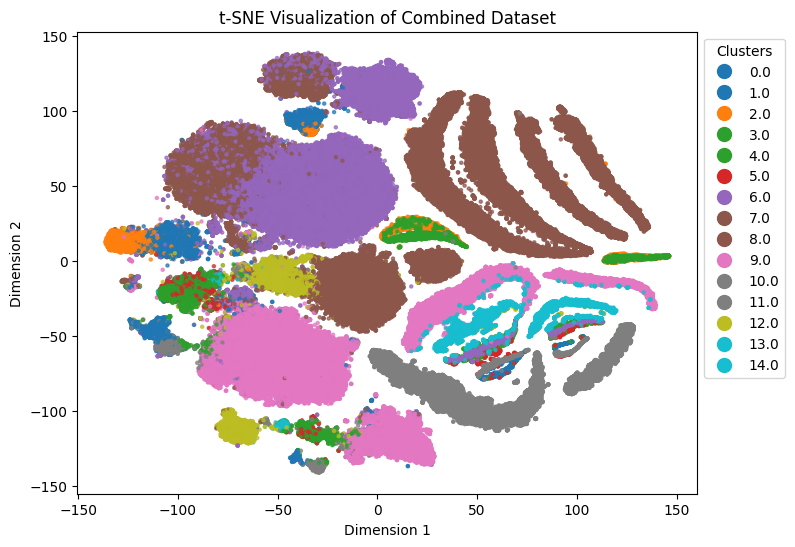

In [ ]:
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Extract features and labels for t-SNE
features = combined_dataset.drop(columns=['label']).to_numpy()
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Combined Dataset")


<ipython-input-47-079d309a149f>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors


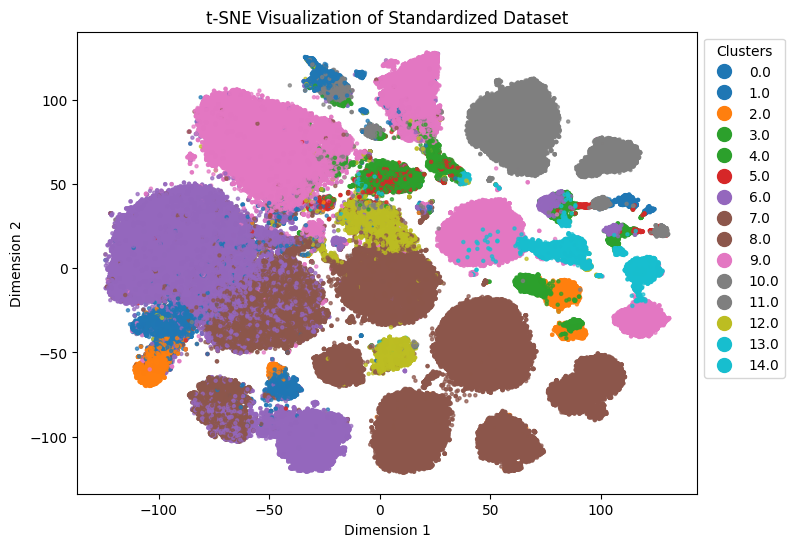

In [ ]:
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

# Combine labeled and unlabeled data with predicted labels
def combine_dataset(x_labeled, y_labeled, x_unlabeled, y_unlab_pred):
    labeled_data = pd.DataFrame(x_labeled)
    labeled_data['label'] = y_labeled

    unlabeled_data = pd.DataFrame(x_unlabeled)
    unlabeled_data['label'] = y_unlab_pred

    combined_dataset = pd.concat([labeled_data, unlabeled_data], ignore_index=True)
    return combined_dataset

# Generate t-SNE visualization with distinct cluster colors
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    # Ensure labels are integers for discrete colormap
    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

    # Map each label to a discrete color index
    discrete_colors = np.array([label_to_color[label] for label in labels])

    # Generate a discrete colormap
    cmap = plt.cm.get_cmap('tab10', len(unique_labels))  # Use 'tab10' for up to 10 unique colors

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=discrete_colors, cmap=cmap, s=5, alpha=0.7)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10) for idx in range(len(unique_labels))]
    plt.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))
    plt.show()

# Combine the labeled and unlabeled data
combined_dataset = combine_dataset(
    x_labeled=x_labeled.to_numpy(),
    y_labeled=y_labeled.to_numpy(),
    x_unlabeled=x_unlabeled_scaled,
    y_unlab_pred=y_unlab_pred
)

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(combined_dataset.drop(columns=['label']).to_numpy())

# Extract labels
labels = combined_dataset['label'].to_numpy()

# Generate t-SNE plot with distinct cluster colors
plot_tsne_opentsne(features, labels, title="t-SNE Visualization of Standardized Dataset")


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existin

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from openTSNE import TSNE
import matplotlib.pyplot as plt
from matplotlib import colormaps  # I    mport for the updated colormap handling
from tensorflow.keras.models import load_model

# Define function to generate predictions for unlabeled data
def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """Generate predictions for unlabeled data."""
    x_unlab_encoded = encoder.predict(x_unlab)  # Encode unlabeled data
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)  # Predict with classifier
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)  # Get predicted class labels
    return y_unlab_pred

# Define the function for t-SNE visualization
def plot_tsne_opentsne(features, labels, title="t-SNE Visualization"):
    """Generate t-SNE visualization with distinct cluster colors."""
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    tsne_result = tsne.fit(features)

    unique_labels = np.unique(labels)
    label_to_color = {label: idx for idx, label in enumerate(unique_labels)}
    discrete_colors = np.array([label_to_color[label] for label in labels])

    cmap = colormaps.get_cmap('tab10')  # Get the colormap
    fig, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(
        tsne_result[:, 0],
        tsne_result[:, 1],
        c=discrete_colors,
        cmap=cmap,
        s=5,
        alpha=0.7
    )
    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')

    # Add a legend for clusters
    handles = [
        plt.Line2D([], [], marker='o', color=cmap(idx / len(unique_labels)), linestyle='', markersize=10)
        for idx in range(len(unique_labels))
    ]
    ax.legend(handles, unique_labels, title="Clusters", loc="best", bbox_to_anchor=(1, 1))

    return fig

# Define Gradio function to process and visualize
def process_and_visualize(start_row, end_row):
    """
    Process the `x_unlabeled` variable, predict labels, and visualize with t-SNE.
    Takes a range of rows as input from the user.
    """
    # Ensure x_unlabeled is preloaded
    global x_unlabeled

    # Convert input to integers
    start_row = int(start_row)
    end_row = int(end_row)

    # Select rows from x_unlabeled based on the provided range
    x_unlabeled_subset = x_unlabeled[start_row:end_row]

    # Ensure model and encoder are preloaded
    encoder = load_model(encoder_path)  # Load pre-trained encoder
    predictor = trained_model  # Assume predictor is already trained

    # Generate predictions
    predicted_labels = generate_unlabeled_predictions(x_unlabeled_subset, encoder, predictor)

    # Create t-SNE visualization
    tsne_plot = plot_tsne_opentsne(x_unlabeled_subset, predicted_labels, title="t-SNE Visualization of Input Data")

    # Return the visualization and predictions
    return tsne_plot, pd.DataFrame({"Predicted Labels": predicted_labels}).head(10)

# Initialize Gradio Interface
inputs = [
    gr.Number(label="Start Row", value=3, precision=0),  # Input for the starting row
    gr.Number(label="End Row", value=109, precision=0)   # Input for the ending row
]

outputs = [
    gr.Plot(label="t-SNE Visualization"),
    gr.Dataframe(label="Predicted Labels (Top 10)")
]

gr.Interface(
    fn=process_and_visualize,
    inputs=inputs,  # Use the range inputs
    outputs=outputs,
    title="Self-Supervised Learning Visualizer",
    description="Enter the  `x_unlabeled` dataset for visualization and prediction."
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ddaf09c50afdd35b7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


19/19 [==============================] - 0s 1ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ddaf09c50afdd35b7d.gradio.live
